Referências:
    
- Matplotlib: https://matplotlib.org/stable/index.html
    
- Seaborn: https://seaborn.pydata.org/
        
- Plotly: https://plotly.com/python/getting-started/        

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

pd.options.display.max_columns = None

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
os.listdir('dataset')

['canada.csv',
 'employment.csv',
 'fish.csv',
 'housing.csv',
 'insurance.csv',
 'pokemon_updated.csv',
 'studentp.csv']

### Loading Datasets

In [3]:
insurance = pd.read_csv('dataset/insurance.csv')
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
employment = pd.read_csv('dataset/employment.csv', sep=';')
employment['Unemployed'] = employment['Unemployed'].apply(lambda x: int(x.replace('.','')))
employment.head()

Age Gender  Period  Unemployed
0  16 to 19 years    Men  jan/05       91000
1  20 to 24 years    Men  jan/05      175000
2  25 to 34 years    Men  jan/05      194000
3  35 to 44 years    Men  jan/05      201000
4  45 to 54 years    Men  jan/05      207000

In [5]:
pokemon = pd.read_csv("dataset/pokemon_updated.csv")
pokemon.head(10)

#                       Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1                  Bulbasaur  Grass  Poison  45      49       49       65   
1  2                    Ivysaur  Grass  Poison  60      62       63       80   
2  3                   Venusaur  Grass  Poison  80      82       83      100   
3  3      VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4                 Charmander   Fire     NaN  39      52       43       60   
5  5                 Charmeleon   Fire     NaN  58      64       58       80   
6  6                  Charizard   Fire  Flying  78      84       78      109   
7  6  CharizardMega Charizard X   Fire  Dragon  78     130      111      130   
8  6  CharizardMega Charizard Y   Fire  Flying  78     104       78      159   
9  7                   Squirtle  Water     NaN  44      48       65       50   

   Sp. Def  Speed  Generation  Legendary  Total  
0       65     45           1      False    318  
1       80     60           1      False    405  
2      100     80           1      False    525  
3      120     80           1      False    625  
4       50     65           1      False    309  
5       65     80           1      False    405  
6       85    100           1      False    534  
7       85    100           1      False    634  
8      115    100           1      False    634  
9       64     43           1      False    314

In [6]:
stdperf = pd.read_csv("dataset/studentp.csv")
stdperf.head(10)

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
5                    none          71             83             78  
6               completed          88             95             92  
7                    none          40             43             39  
8               completed          64             64             67  
9                    none          38             60             50

In [7]:
fish= pd.read_csv("dataset/Fish.csv")
fish.head(10)

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5   Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6   Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7   Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8   Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9   Bream   500.0     28.5     30.7     36.2  14.2266  4.9594

In [8]:
fish1 = fish[fish['Species'].isin(['Bream', 'Perch', 'Pike'])]
fish1.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [9]:
canada = pd.read_csv("dataset/canada.csv")
canada.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  1981  1982  1983  1984  \
0    Southern Asia  902  Developing regions    16    39    39    47    71   
1  Southern Europe  901   Developed regions     1     0     0     0     0   
2  Northern Africa  902  Developing regions    80    67    71    69    63   
3        Polynesia  902  Developing regions     0     1     0     0     0   
4  Southern Europe  901   Developed regions     0     0     0     0     0   

   1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  \
0   340   496   741   828  1076  1028  1378  1170   713   858  1537  2212   
1     0     1     2     2     3     3    21    56    96    71    63   113   
2    44    69   132   242   434   491   872   795   717   595  1106  2054   
3     0     0     1     0     1     2     0     0     0     0     0     0   
4     0     2     0     0     0     3     0     1     0     0     0     0   

   1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
0  2555  1999  2395  3326  4067  3697  3479  2978  3436  3009  2652  2111   
1   307   574  1264  1816  1602  1021   853  1450  1223   856   702   560   
2  1842  2292  2389  2867  3418  3406  3072  3616  3626  4807  3623  4005   
3     0     0     0     0     0     0     0     0     0     1     0     0   
4     0     2     0     0     1     0     2     0     0     1     1     0   

   2009  2010  2011  2012  2013  
0  1746  1758  2203  2635  2004  
1   716   561   539   620   603  
2  5393  4752  4325  3774  4331  
3     0     0     0     0     0  
4     0     0     0     1     1

In [10]:
canada.columns

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [11]:
canada.drop(columns=['AREA' , 'DEV', 'DevName' , 'REG', 'Type', 'Coverage' , 'AreaName', 'RegName' ], inplace=True)
canada.head()

OdName  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
0     Afghanistan    16    39    39    47    71   340   496   741   828  1076   
1         Albania     1     0     0     0     0     0     1     2     2     3   
2         Algeria    80    67    71    69    63    44    69   132   242   434   
3  American Samoa     0     1     0     0     0     0     0     1     0     1   
4         Andorra     0     0     0     0     0     0     2     0     0     0   

   1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  \
0  1028  1378  1170   713   858  1537  2212  2555  1999  2395  3326  4067   
1     3    21    56    96    71    63   113   307   574  1264  1816  1602   
2   491   872   795   717   595  1106  2054  1842  2292  2389  2867  3418   
3     2     0     0     0     0     0     0     0     0     0     0     0   
4     3     0     1     0     0     0     0     0     2     0     0     1   

   2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
0  3697  3479  2978  3436  3009  2652  2111  1746  1758  2203  2635  2004  
1  1021   853  1450  1223   856   702   560   716   561   539   620   603  
2  3406  3072  3616  3626  4807  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     1     0     0     0     0     0     0     0  
4     0     2     0     0     1     1     0     0     0     0     1     1

In [12]:
canada.rename(columns={'OdName':'Country'} , inplace=True)
canada.set_index(canada.Country,inplace=True)
canada.head()

Country  1980  1981  1982  1983  1984  1985  1986  \
Country                                                                    
Afghanistan        Afghanistan    16    39    39    47    71   340   496   
Albania                Albania     1     0     0     0     0     0     1   
Algeria                Algeria    80    67    71    69    63    44    69   
American Samoa  American Samoa     0     1     0     0     0     0     0   
Andorra                Andorra     0     0     0     0     0     0     2   

                1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  \
Country                                                                      
Afghanistan      741   828  1076  1028  1378  1170   713   858  1537  2212   
Albania            2     2     3     3    21    56    96    71    63   113   
Algeria          132   242   434   491   872   795   717   595  1106  2054   
American Samoa     1     0     1     2     0     0     0     0     0     0   
Andorra            0     0     0     3     0     1     0     0     0     0   

                1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
Country                                                                      
Afghanistan     2555  1999  2395  3326  4067  3697  3479  2978  3436  3009   
Albania          307   574  1264  1816  1602  1021   853  1450  1223   856   
Algeria         1842  2292  2389  2867  3418  3406  3072  3616  3626  4807   
American Samoa     0     0     0     0     0     0     0     0     0     1   
Andorra            0     2     0     0     1     0     2     0     0     1   

                2007  2008  2009  2010  2011  2012  2013  
Country                                                   
Afghanistan     2652  2111  1746  1758  2203  2635  2004  
Albania          702   560   716   561   539   620   603  
Algeria         3623  4005  5393  4752  4325  3774  4331  
American Samoa     0     0     0     0     0     0     0  
Andorra            1     0     0     0     0     1     1

In [13]:
canada.index.name=None
canada.head()

Country  1980  1981  1982  1983  1984  1985  1986  \
Afghanistan        Afghanistan    16    39    39    47    71   340   496   
Albania                Albania     1     0     0     0     0     0     1   
Algeria                Algeria    80    67    71    69    63    44    69   
American Samoa  American Samoa     0     1     0     0     0     0     0   
Andorra                Andorra     0     0     0     0     0     0     2   

                1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  \
Afghanistan      741   828  1076  1028  1378  1170   713   858  1537  2212   
Albania            2     2     3     3    21    56    96    71    63   113   
Algeria          132   242   434   491   872   795   717   595  1106  2054   
American Samoa     1     0     1     2     0     0     0     0     0     0   
Andorra            0     0     0     3     0     1     0     0     0     0   

                1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
Afghanistan     2555  1999  2395  3326  4067  3697  3479  2978  3436  3009   
Albania          307   574  1264  1816  1602  1021   853  1450  1223   856   
Algeria         1842  2292  2389  2867  3418  3406  3072  3616  3626  4807   
American Samoa     0     0     0     0     0     0     0     0     0     1   
Andorra            0     2     0     0     1     0     2     0     0     1   

                2007  2008  2009  2010  2011  2012  2013  
Afghanistan     2652  2111  1746  1758  2203  2635  2004  
Albania          702   560   716   561   539   620   603  
Algeria         3623  4005  5393  4752  4325  3774  4331  
American Samoa     0     0     0     0     0     0     0  
Andorra            1     0     0     0     0     1     1

In [14]:
del canada['Country']
canada.head()

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
Afghanistan       16    39    39    47    71   340   496   741   828  1076   
Albania            1     0     0     0     0     0     1     2     2     3   
Algeria           80    67    71    69    63    44    69   132   242   434   
American Samoa     0     1     0     0     0     0     0     1     0     1   
Andorra            0     0     0     0     0     0     2     0     0     0   

                1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
Afghanistan     1028  1378  1170   713   858  1537  2212  2555  1999  2395   
Albania            3    21    56    96    71    63   113   307   574  1264   
Algeria          491   872   795   717   595  1106  2054  1842  2292  2389   
American Samoa     2     0     0     0     0     0     0     0     0     0   
Andorra            3     0     1     0     0     0     0     0     2     0   

                2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Afghanistan     3326  4067  3697  3479  2978  3436  3009  2652  2111  1746   
Albania         1816  1602  1021   853  1450  1223   856   702   560   716   
Algeria         2867  3418  3406  3072  3616  3626  4807  3623  4005  5393   
American Samoa     0     0     0     0     0     0     1     0     0     0   
Andorra            0     1     0     2     0     0     1     1     0     0   

                2010  2011  2012  2013  
Afghanistan     1758  2203  2635  2004  
Albania          561   539   620   603  
Algeria         4752  4325  3774  4331  
American Samoa     0     0     0     0  
Andorra            0     0     1     1

In [15]:
canada = canada.transpose()

In [16]:
canada.head()

Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
1980           16        1       80               0        0       1   
1981           39        0       67               1        0       3   
1982           39        0       71               0        0       6   
1983           47        0       69               0        0       6   
1984           71        0       63               0        0       4   

      Antigua and Barbuda  Argentina  Armenia  Australia  Austria  Azerbaijan  \
1980                    0        368        0        702      234           0   
1981                    0        426        0        639      238           0   
1982                    0        626        0        484      201           0   
1983                    0        241        0        317      117           0   
1984                   42        237        0        317      127           0   

      Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  \
1980       26        0          83       372        0      511      16      2   
1981       23        2          84       376        0      540      27      5   
1982       38        1          86       299        0      519      13      4   
1983       12        1          81       244        0      297      21      3   
1984       21        1          98       265        0      183      37      4   

      Bhutan  Bolivia (Plurinational State of)  Bosnia and Herzegovina  \
1980       0                                44                       0   
1981       0                                52                       0   
1982       0                                42                       0   
1983       0                                49                       0   
1984       1                                38                       0   

      Botswana  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  Burundi  \
1980        10     211                 79        24             2        0   
1981         1     220                  6        20             1        0   
1982         3     192                  8        12             3        0   
1983         3     139                  2        33             2        0   
1984         7     145                  2        11             3        1   

      Cabo Verde  Cambodia  Cameroon  Canada  Central African Republic  Chad  \
1980           1        12         9       0                         4     0   
1981           1        19         2       0                         3     0   
1982           2        26        16       0                         1     1   
1983           0        33         7       0                         0     0   
1984          11        10         8       0                         0     0   

      Chile  China  China, Hong Kong Special Administrative Region  \
1980   1233   5123                                               0   
1981   1069   6682                                               0   
1982   1078   3308                                               0   
1983    781   1863                                               0   
1984    681   1527                                               0   

      China, Macao Special Administrative Region  Colombia  Comoros  Congo  \
1980                                           0       266        0      2   
1981                                           0       326        2      0   
1982                                           0       360        2      1   
1983                                           0       244        0      0   
1984                                           0       235        0      1   

      Costa Rica  Côte d'Ivoire  Croatia  Cuba  Cyprus  Czech Republic  \
1980          28             14        0   306     132               0   
1981          35              8        0    41     128               0   
1982          42             10        0    94      84               0   
1983          51  

In [17]:
housing = pd.read_csv('dataset/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Scatter Graphs

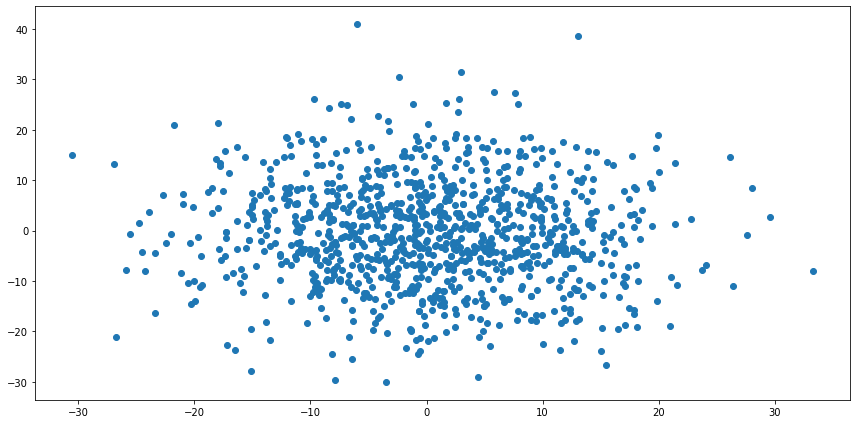

In [18]:
plt.figure(figsize=(12,6))
x = np.random.normal(0, 10, 1000)
y = np.random.normal(0, 10, 1000)
plt.scatter(x,y)
plt.tight_layout()
plt.show()

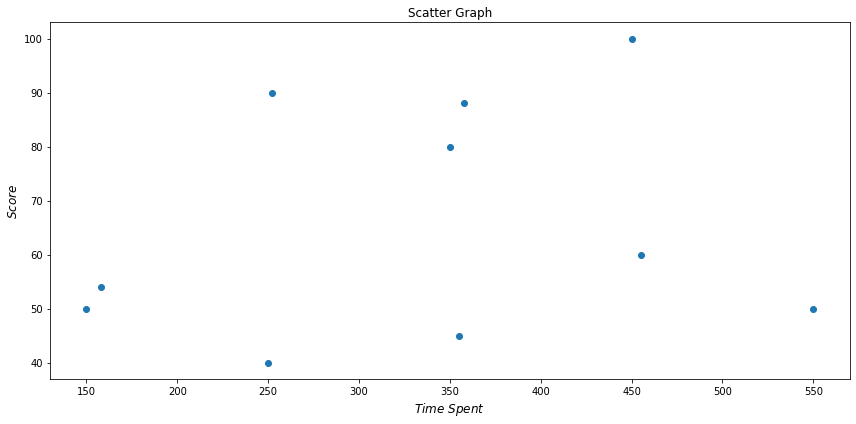

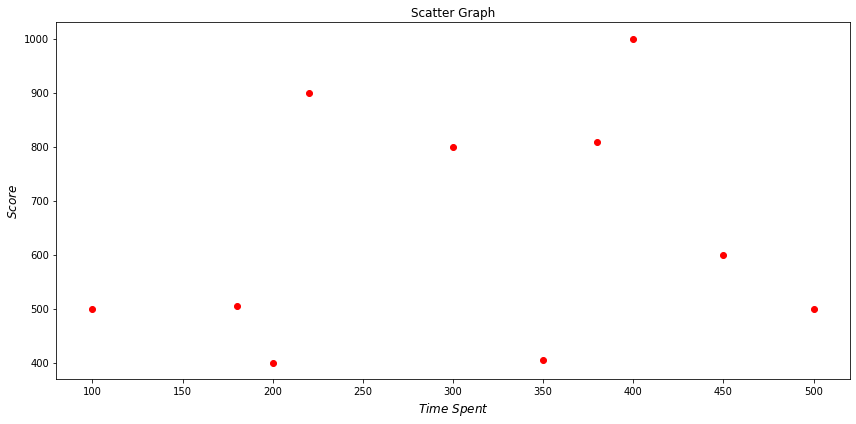

In [19]:
x1 = np.array([250,150,350,252,450,550,455,358,158,355])
y1 =np.array([40,50,80, 90, 100,50,60,88,54,45])

x2 = np.array([200,100,300,220,400,500,450,380,180,350])
y2 = np.array([400,500,800, 900, 1000,500,600,808,504,405])

#Graph - 1
plt.figure(figsize=(12,6))
plt.scatter(x1, y1)
plt.xlabel('$Time $ $ Spent$', fontsize = 12)
plt.ylabel('$Score$', fontsize = 12)
plt.title ('Scatter Graph')
plt.tight_layout()
plt.show()

#Graph - 2
plt.figure(figsize=(12,6))
plt.scatter(x2, y2, color = 'r')
plt.xlabel('$Time $ $ Spent$', fontsize = 12)
plt.ylabel('$Score$', fontsize = 12)
plt.title ('Scatter Graph')
plt.tight_layout()
plt.show()

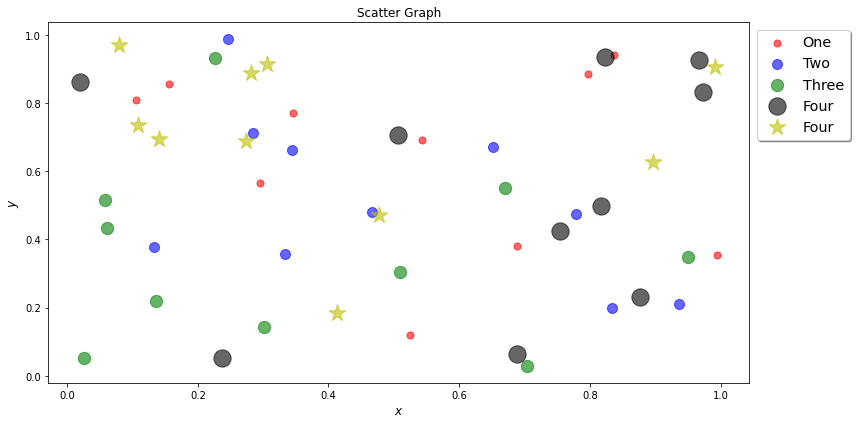

In [20]:
plt.figure(figsize=(12,6))

# color -> https://matplotlib.org/stable/tutorials/colors/colors.html
# marker -> https://matplotlib.org/stable/api/markers_api.html
# alpha -> softnening colors

plt.scatter(np.random.random(10), np.random.random(10), c='r', s=50 , alpha=0.6 , marker='o', label = 'One' )
plt.scatter(np.random.random(10), np.random.random(10), c='b', s=100 , alpha=0.6 , marker='o', label = 'Two')
plt.scatter(np.random.random(10), np.random.random(10), c='g', s=150 , alpha=0.6 , marker='o', label = 'Three')
plt.scatter(np.random.random(10), np.random.random(10), c='k', s=300 , alpha=0.6 , marker='o', label = 'Four')
plt.scatter(np.random.random(10), np.random.random(10), c='y', s=300 , alpha=0.6 , marker='*', label = 'Four')

plt.xlabel('$x$' , fontsize = 12)
plt.ylabel('$y$' , fontsize = 12)
plt.title ('Scatter Graph')
plt.legend(bbox_to_anchor=(1.0, 1.0), shadow=True, fontsize='x-large')
plt.tight_layout()
plt.show()

In [21]:
insurance.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

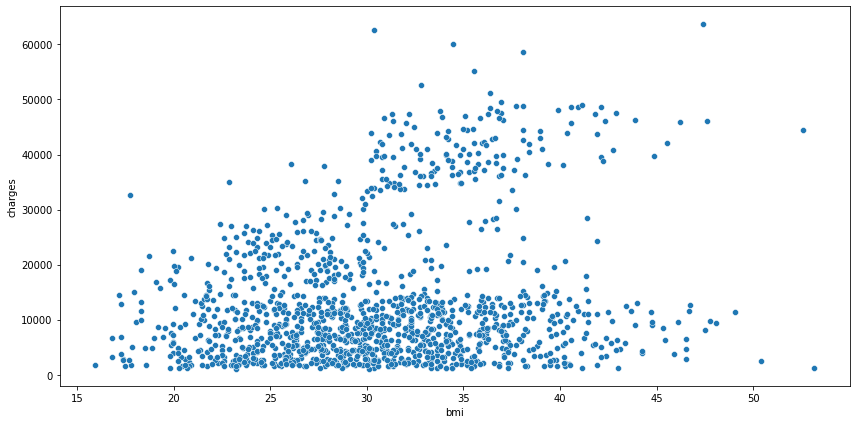

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=insurance['bmi'], y=insurance['charges'])
plt.tight_layout()
plt.show()

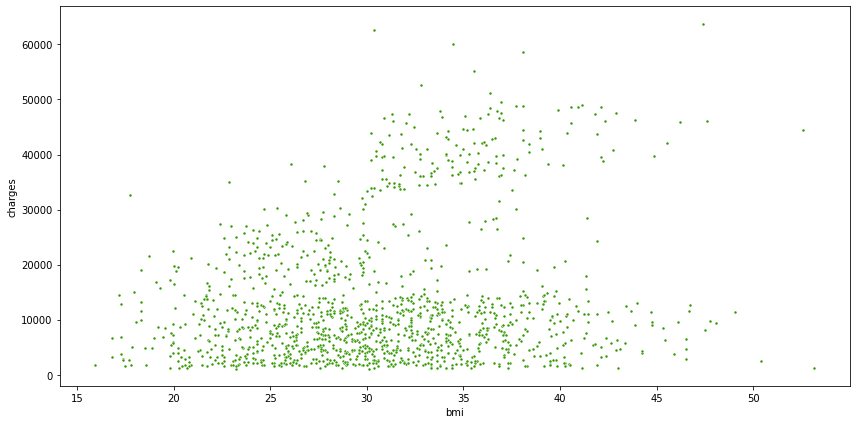

In [23]:
#Changing the shape of data points using "marker" parameter
plt.figure(figsize=(12,6))
sns.scatterplot(x=insurance['bmi'], y=insurance['charges'], color='#339900', marker = ".")
plt.tight_layout()
plt.show()

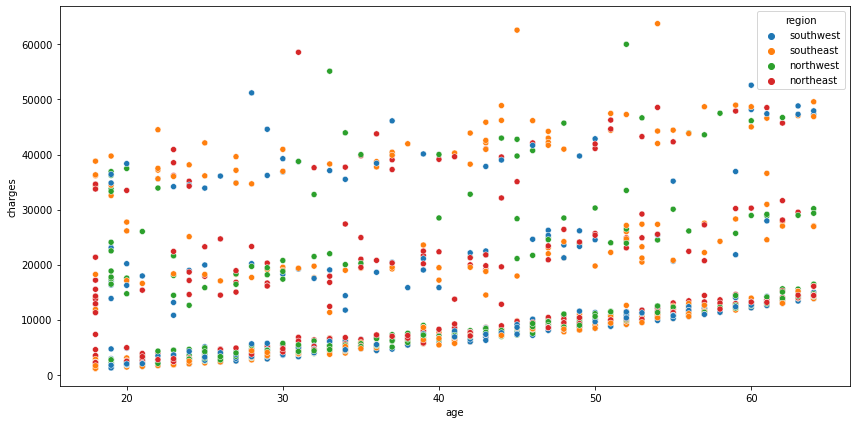

In [24]:
# Show groups with different colors using "hue"
plt.figure(figsize=(12,6))
sns.scatterplot(x=insurance['age'], y=insurance['charges'], hue=insurance['region'])
plt.tight_layout()
plt.show()

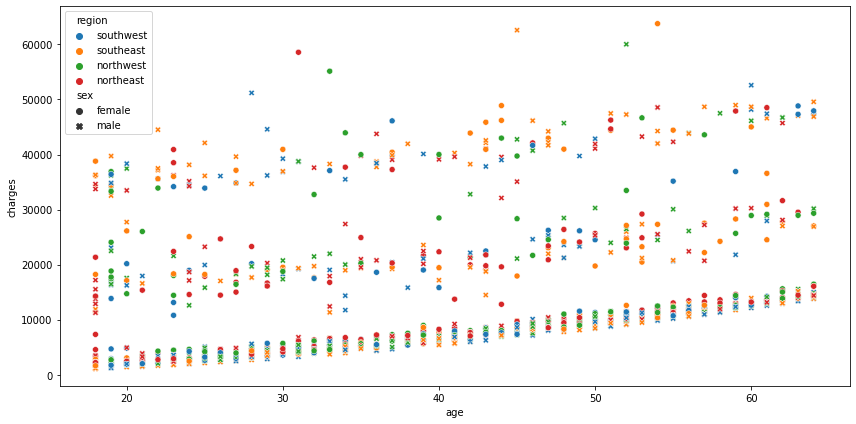

In [25]:
# Showing two different grouping variables using "hue" amd "style" parameter
plt.figure(figsize=(12,6))
sns.scatterplot(x=insurance['age'], y=insurance['charges'], hue=insurance['region'], style=insurance['sex'])
plt.tight_layout()
plt.show()

In [26]:
pokemon.head()

#                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  Total  
0       65     45           1      False    318  
1       80     60           1      False    405  
2      100     80           1      False    525  
3      120     80           1      False    625  
4       50     65           1      False    309

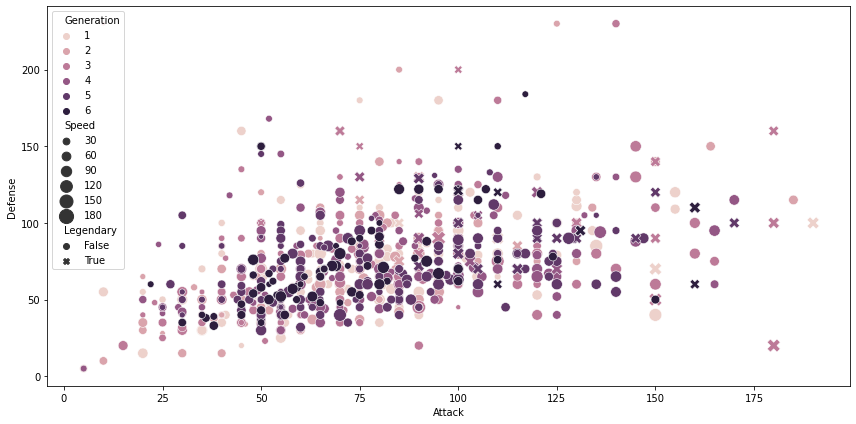

In [27]:
# Varying the size of the points for a quantitative variable using "size" parameter
plt.figure(figsize=(12,6))
sns.scatterplot(x = pokemon['Attack'], y = pokemon['Defense'],
                hue = pokemon['Generation'],
                size = pokemon['Speed'], sizes = (20,200),
                style = pokemon['Legendary'])

plt.tight_layout()
plt.show()

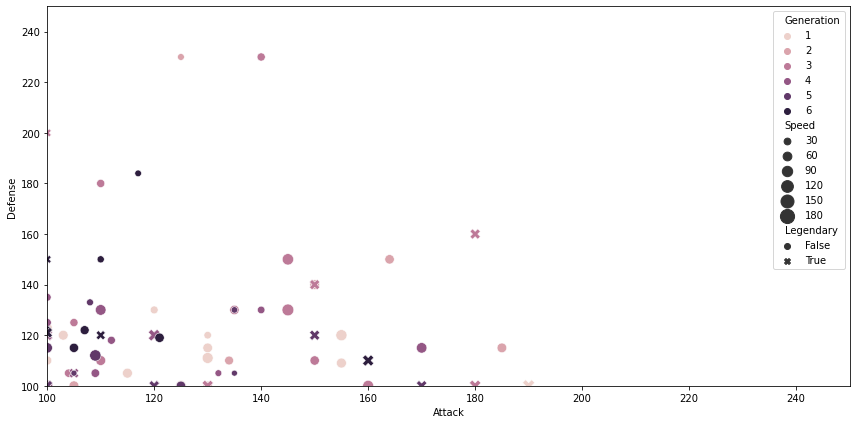

In [28]:
#Setting x,y limit using "plt.xlim","plt.ylim"
plt.figure(figsize=(12,6))
sns.scatterplot(x = pokemon['Attack'], y = pokemon['Defense'],
                hue = pokemon['Generation'],
                size = pokemon['Speed'], sizes = (20,200),
                style = pokemon['Legendary'])

plt.xlim([100,250])
plt.ylim([100,250])

plt.tight_layout()
plt.show()

In [29]:
#Simple Scatter Plot
random_x = np.random.randint(1,100,50)
random_y = np.random.randint(1,100,50)

frame = [go.Scatter(x = random_x, y = random_y,
                    mode = 'markers')]

fig = go.Figure(data=frame)
fig.show()

In [30]:
x_values = np.linspace(0, 100, 100) # 100 evenly spaced values
y_values = np.random.randn(100)    # 100 random values

trace0 = go.Scatter(x = x_values, y = y_values,
                    mode = 'markers',
                    marker = dict(size = 7, 
                                  color = '#F4D03F',
                                  symbol = 'circle',
                                  line = dict(width = 1, color = '#0E8700')))

trace1 = go.Scatter(x = x_values, y = y_values-5,
                    mode = 'markers',
                    marker = dict(size = 7, 
                                  color = '#A9DFBF',
                                  symbol = 'circle',
                                  line = dict(width = 1, color = '#0E8700')))

data = [trace0, trace1]
fig = go.Figure(data=data)
fig.show()

In [31]:
#Simple Scatter Plot
random_x = np.random.randint(1,100,50)
random_y = np.random.randint(1,100,50)

fig = go.Figure()

fig.add_trace(go.Scatter(x = random_x, y = random_y,
                         mode = 'markers'))

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis=dict(title_text="X-axis Title"),
    yaxis=dict(title_text="Y-axis Title"))

fig.show()

In [32]:
# Changing Marker size, shape & color using Marker parameter
random_x = np.random.randint(1,100,50)
random_y = np.random.randint(1,100,50)

fig = go.Figure()

fig.add_trace(go.Scatter(x = random_x, y = random_y,
                         mode = 'markers',
                         marker = dict(
                                   size = 10, 
                                   color = '#ff4500', #color of marker
                                   symbol = 'square', #shape of scatter plot
                                   line = dict(width = 2) #width of boundary
                                 )))

fig.update_layout(
    title = '$Scatter Plot$',
    autosize=False,
    width=1000,
    height=500,
    xaxis=dict(title_text="X-axis Title"),
    yaxis=dict(title_text="Y-axis Title"))

fig.show()

In [33]:
insurance.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [34]:
fig = go.Figure()

# trace0 will capture all smokers
fig.add_trace(go.Scatter(x = insurance[insurance['smoker'] == 'yes']['bmi'],
                         y = insurance[insurance['smoker'] == 'yes']['charges'],
                         mode = 'markers',
                         name = 'Smoker',
                         marker = dict(size = 14, color = '#9ca4c4', symbol = 'circle',
                                       line = dict(width = 1, color = '#5D6D7E'))))
              
# trace1 will capture all non-smokers
fig.add_trace(go.Scatter(x = insurance[insurance['smoker'] == 'no']['bmi'],
                         y = insurance[insurance['smoker'] == 'no']['charges'],
                         mode = 'markers',
                         name = 'Non-Smoker',
                         marker = dict(size = 14, color = '#cbcbcb', symbol = 'circle',
                                       line = dict(width = 1, color = '#626567'))))

#Layout Setting
fig.update_layout(go.Layout(title=dict(text = "Insurance Data",x=0.5,y=0.95),
                            title_font_size=14,
                            title_font_color='#F1C40F',
                            xaxis=dict(showgrid=False, # Hide Gridlines
                                       showline=True, # Show X-Axis
                                       linecolor='black', # Color of X-axis
                                       tickfont_color='black', #Color of ticks
                                       showticklabels=True, #Show X labels
                                       dtick=5,
                                       ticks='outside',
                                       tickcolor='black'),
                            yaxis=dict(showgrid=False,
                                       showline=True,
                                       linecolor='black',
                                       tickfont_color='black',
                                       showticklabels=True,
                                       ticks='outside',
                                       tickcolor='black'),
                            legend=dict(font_size=15,
                                        yanchor='bottom',
                                        xanchor='right'),
                            paper_bgcolor='white',
                            plot_bgcolor='white',
                            hovermode='closest',
                            width=1000,
                            height=500))

fig.show()

In [35]:
# Display multiple Scatter plots in one figure using Subplots

from plotly.subplots import make_subplots

#Subplot initialization
fig = make_subplots(
                     rows=1, 
                     cols=2,
                     subplot_titles=("Subplot-1", "Subplot-2")
                   )


# Subplot - 1 (Add graph object trace to a figure)
fig.add_trace(go.Scatter
                  (
                    x = insurance[insurance['smoker'] == 'yes']['bmi'],
                    y = insurance[insurance['smoker'] == 'yes']['charges'],
                    mode = 'markers',
                    marker = dict(size = 10, color = '#4ED700',symbol = 'circle',line = dict(width = 1,color = '#0E8700'))
                  ),
              row=1, col=1
             )

# Add graph object trace to a figure
fig.add_trace(go.Scatter
                  (
                    x = insurance[insurance['smoker'] == 'no']['bmi'],
                    y = insurance[insurance['smoker'] == 'no']['charges'],
                    mode = 'markers',
                    marker = dict(size = 10, color = '#FFC107',symbol = 'circle',line = dict(width = 1))
                   ),
              row=1, col=2
             )

#Update traces in Suplots
fig.update_traces(
                  marker=dict(color="#5DADE2"),
                  col=1,
                  row = 1
                 )

#Update traces in Suplots
fig.update_traces(
                  marker=dict(color="#E67E22"),
                  col=2,
                  row = 1
                 )
fig.show()

# Line Graphs

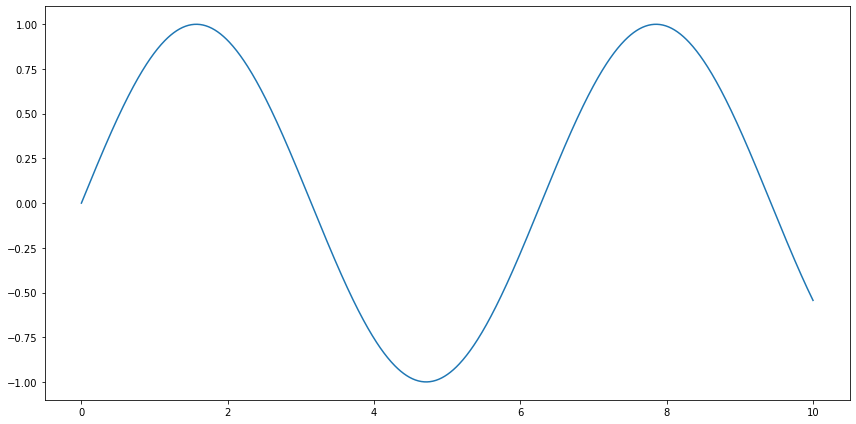

In [36]:
plt.figure(figsize=(12,6))

x = np.linspace(0, 10, 1000) 
y = np.sin(x)

plt.plot(x,y)

plt.tight_layout()
plt.show()

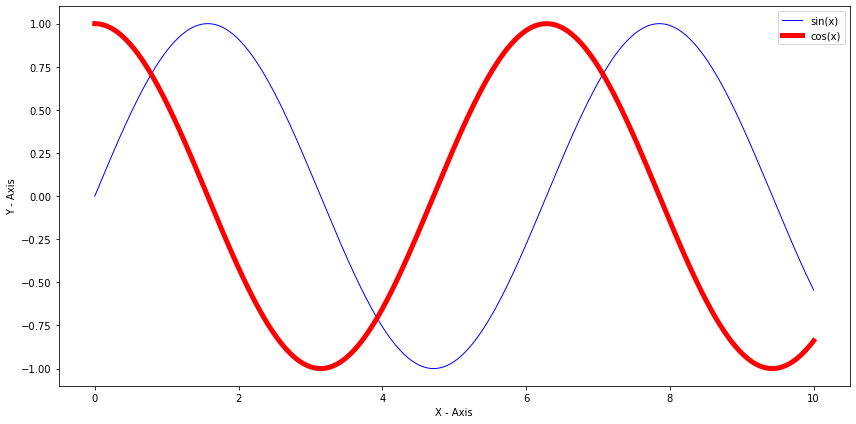

In [37]:
# Solid blue line will be plotted using the argument "b-"
plt.figure(figsize=(12,6))

x = np.linspace(0, 10, 1000) 
y = np.sin(x)

plt.plot(x,y,'b-', linewidth = 1, label='sin(x)')

x = np.linspace(0, 10, 1000) 
y = np.cos(x)

plt.plot(x,y,'r-', linewidth = 5, label='cos(x)')

plt.xlabel("X - Axis")
plt.ylabel("Y - Axis")
plt.legend()

plt.tight_layout()
plt.show()

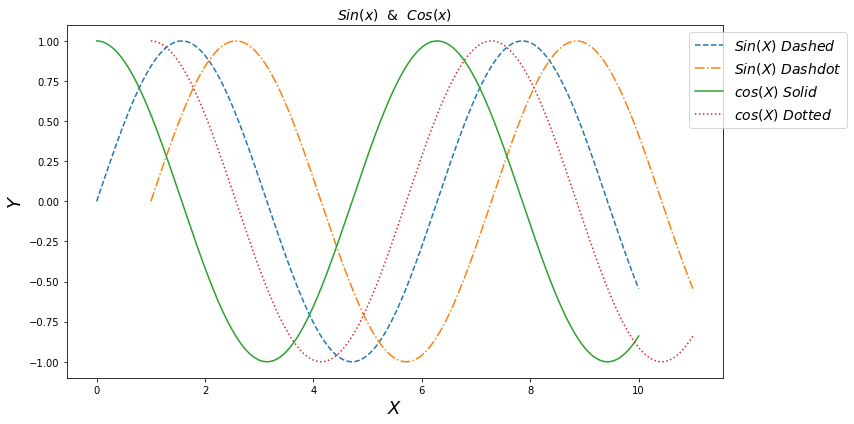

In [38]:
# Line Styling
x = np.linspace(0, 10, 2000)  
plt.figure(figsize=(12, 6))

plt.plot(x  , np.sin(x), label = '$Sin(X)$ $ Dashed $', linestyle='dashed')
plt.plot(x+1, np.sin(x), label = '$Sin(X)$ $ Dashdot $', linestyle='dashdot')
plt.plot(x  , np.cos(x), label = '$cos(X)$ $ Solid $', linestyle='solid')
plt.plot(x+1, np.cos(x), label = '$cos(X)$ $ Dotted $', linestyle='dotted')

plt.xlabel(r'$X$' , fontsize = 18)
plt.ylabel(r'$Y$' , fontsize = 18)

plt.title("$Sin(x) $  $ & $  $ Cos(x)$", fontsize = 14)
plt.legend(loc = 'upper right', fontsize = 14, bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
plt.show()

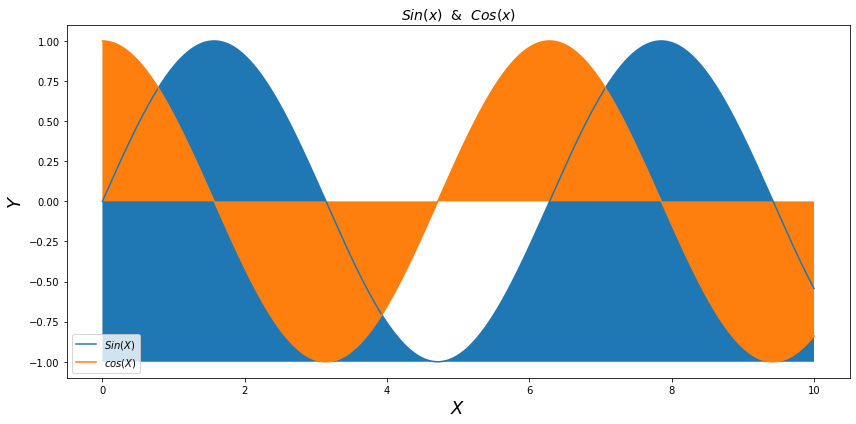

In [39]:
# Shading Regions with fill_between() function
x = np.linspace(0, 10, 2000)  
plt.figure(figsize=(12,6))

plt.plot(x, np.sin(x) , label = '$Sin(X)$')
plt.plot(x, np.cos(x) , label = '$cos(X)$')
plt.fill_between(x, -1, np.sin(x))
plt.fill_between(x, 0, np.cos(x))

plt.xlabel(r'$X$' , fontsize = 18)
plt.ylabel(r'$Y$' , fontsize = 18)

plt.title("$Sin(x) $  $ & $  $ Cos(x)$" ,fontsize = 14)
plt.legend(loc = 'lower left') # Legend will be placed at lower left position
plt.tight_layout()
plt.show()

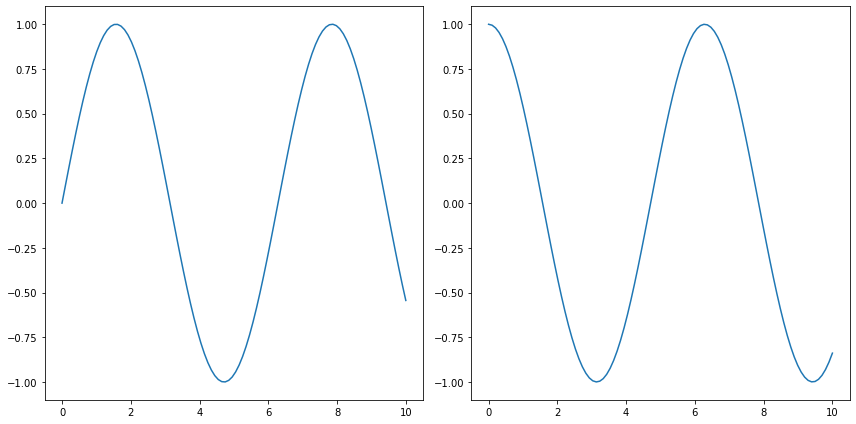

In [40]:
# Display multiple plots in one figure (1 row & 2 columns)
plt.figure(figsize=(12,6))

x = np.linspace(0, 10, 100)
y1 = np.sin(x) # Sine Graph
y2 = np.cos(x) # cosine graph

plt.subplot(1,2,1)
plt.plot(x,y1)

plt.subplot(1,2,2)
plt.plot(x,y2)

plt.tight_layout()
plt.show()

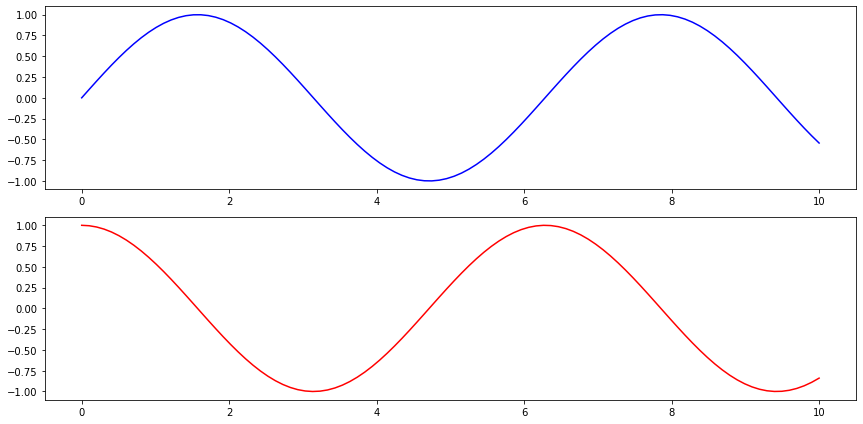

In [41]:
# Display multiple plots in one figure (2 row & 1 columns)

plt.figure(figsize=(12,6))

x = np.linspace(0, 10, 100) 
y1 = np.sin(x) # Sine Graph
y2 = np.cos(x) # cosine graph

plt.subplot(2,1,1)
plt.plot(x,y1, "b-")

plt.subplot(2,1,2)
plt.plot(x,y2, "r-")

plt.tight_layout()
plt.show()

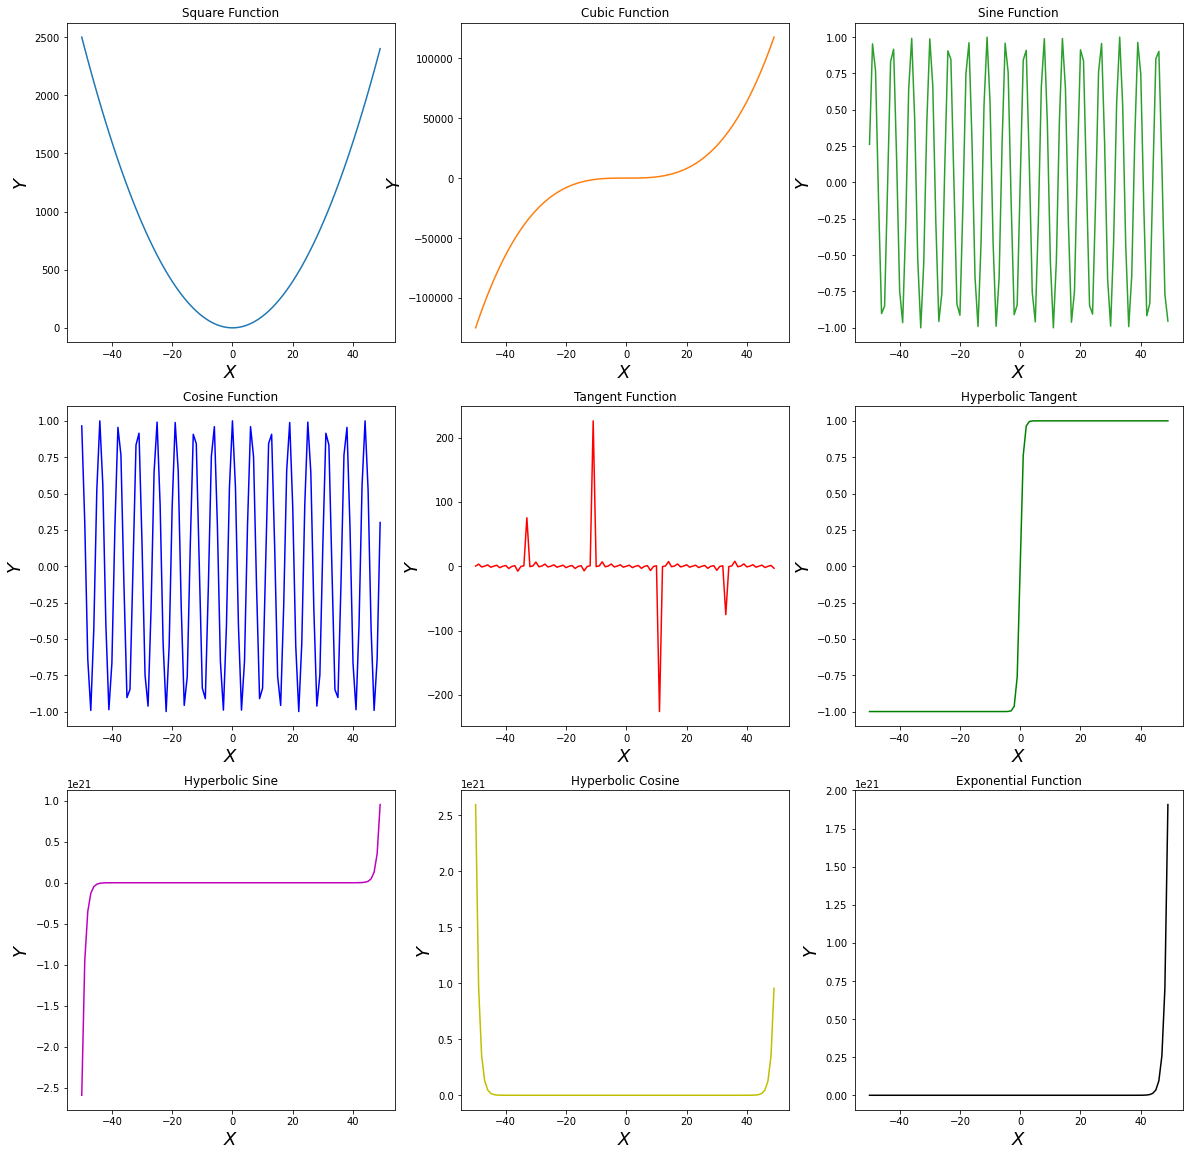

In [42]:
# # Display multiple plots in one figure using subplots()
x = np.arange(-50,50)
y1 = np.power(x,2)
y2 = np.power(x,3)
y3 = np.sin(x)
y4 = np.cos(x)
y5 = np.tan(x)
y6 = np.tanh(x)
y7 = np.sinh(x)
y8 = np.cosh(x)
y9 = np.exp(x)

fig1 , ax1 = plt.subplots(nrows=3,ncols=3 , figsize = (20,20)) # Create a figure and subplots
ax1[0,0].plot(x,y1,"tab:blue") # set the color of the line chart
ax1[0,0].set_title("Square Function") # setting title of subplot
ax1[0,0].set_xlabel(r'$X$' , fontsize = 18) #Set the label for the x-axis
ax1[0,0].set_ylabel(r'$Y$' , fontsize = 18) #Set the label for the y-axis


ax1[0,1].plot(x,y2,"tab:orange")
ax1[0,1].set_title("Cubic Function")
ax1[0,1].set_xlabel(r'$X$' , fontsize = 18)
ax1[0,1].set_ylabel(r'$Y$' , fontsize = 18)

ax1[0,2].plot(x,y3,"tab:green")
ax1[0,2].set_title("Sine Function")
ax1[0,2].set_xlabel(r'$X$' , fontsize = 18)
ax1[0,2].set_ylabel(r'$Y$' , fontsize = 18)


ax1[1,0].plot(x,y4,"b-")
ax1[1,0].set_title("Cosine Function")
ax1[1,0].set_xlabel(r'$X$' , fontsize = 18)
ax1[1,0].set_ylabel(r'$Y$' , fontsize = 18)


ax1[1,1].plot(x,y5,"r-")
ax1[1,1].set_title("Tangent Function")
ax1[1,1].set_xlabel(r'$X$' , fontsize = 18)
ax1[1,1].set_ylabel(r'$Y$' , fontsize = 18)

ax1[1,2].plot(x,y6,"g-")
ax1[1,2].set_title("Hyperbolic Tangent")
ax1[1,2].set_xlabel(r'$X$' , fontsize = 18)
ax1[1,2].set_ylabel(r'$Y$' , fontsize = 18)

ax1[2,0].plot(x,y7,"m-")
ax1[2,0].set_title("Hyperbolic Sine")
ax1[2,0].set_xlabel(r'$X$' , fontsize = 18)
ax1[2,0].set_ylabel(r'$Y$' , fontsize = 18)

ax1[2,1].plot(x,y8,"y-")
ax1[2,1].set_title("Hyperbolic Cosine")
ax1[2,1].set_xlabel(r'$X$' , fontsize = 18)
ax1[2,1].set_ylabel(r'$Y$' , fontsize = 18)

ax1[2,2].plot(x,y9,"k-")
ax1[2,2].set_title("Exponential Function")
ax1[2,2].set_xlabel(r'$X$' , fontsize = 18)
ax1[2,2].set_ylabel(r'$Y$' , fontsize = 18)

plt.show()

In [43]:
canada.head()

Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
1980           16        1       80               0        0       1   
1981           39        0       67               1        0       3   
1982           39        0       71               0        0       6   
1983           47        0       69               0        0       6   
1984           71        0       63               0        0       4   

      Antigua and Barbuda  Argentina  Armenia  Australia  Austria  Azerbaijan  \
1980                    0        368        0        702      234           0   
1981                    0        426        0        639      238           0   
1982                    0        626        0        484      201           0   
1983                    0        241        0        317      117           0   
1984                   42        237        0        317      127           0   

      Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  \
1980       26        0          83       372        0      511      16      2   
1981       23        2          84       376        0      540      27      5   
1982       38        1          86       299        0      519      13      4   
1983       12        1          81       244        0      297      21      3   
1984       21        1          98       265        0      183      37      4   

      Bhutan  Bolivia (Plurinational State of)  Bosnia and Herzegovina  \
1980       0                                44                       0   
1981       0                                52                       0   
1982       0                                42                       0   
1983       0                                49                       0   
1984       1                                38                       0   

      Botswana  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  Burundi  \
1980        10     211                 79        24             2        0   
1981         1     220                  6        20             1        0   
1982         3     192                  8        12             3        0   
1983         3     139                  2        33             2        0   
1984         7     145                  2        11             3        1   

      Cabo Verde  Cambodia  Cameroon  Canada  Central African Republic  Chad  \
1980           1        12         9       0                         4     0   
1981           1        19         2       0                         3     0   
1982           2        26        16       0                         1     1   
1983           0        33         7       0                         0     0   
1984          11        10         8       0                         0     0   

      Chile  China  China, Hong Kong Special Administrative Region  \
1980   1233   5123                                               0   
1981   1069   6682                                               0   
1982   1078   3308                                               0   
1983    781   1863                                               0   
1984    681   1527                                               0   

      China, Macao Special Administrative Region  Colombia  Comoros  Congo  \
1980                                           0       266        0      2   
1981                                           0       326        2      0   
1982                                           0       360        2      1   
1983                                           0       244        0      0   
1984                                           0       235        0      1   

      Costa Rica  Côte d'Ivoire  Croatia  Cuba  Cyprus  Czech Republic  \
1980          28             14        0   306     132               0   
1981          35              8        0    41     128               0   
1982          42             10        0    94      84               0   
1983          51  

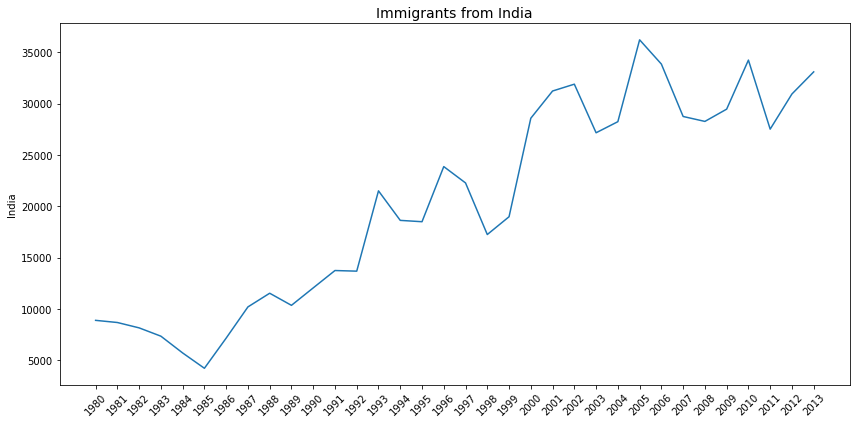

In [44]:
plt.figure(figsize=(12,6))

sns.lineplot(x = canada.index.values, y = canada['India'])

plt.title("Immigrants from India",fontsize = 14)
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
plt.tight_layout()
plt.show()

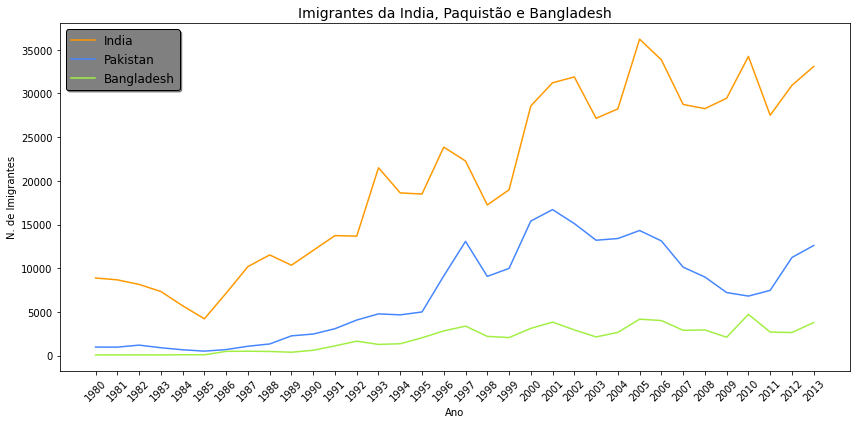

In [45]:
# Plotting multiple sets of data (E.g Immigration data of multiple countries in one plot)
plt.figure(figsize=(12,6))

sns.lineplot(x = canada.index.values, y = canada['India'] , color = '#ff9900' , label= 'India')
sns.lineplot(x = canada.index.values, y = canada['Pakistan'] , color = '#4586ff' , label = 'Pakistan')
sns.lineplot(x = canada.index.values, y = canada['Bangladesh'] , color = '#a2ef44' , label = 'Bangladesh')

plt.title("Imigrantes da India, Paquistão e Bangladesh", fontsize = 14)
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
plt.xlabel('Ano')
plt.ylabel('N. de Imigrantes')
plt.legend(facecolor= 'grey', fontsize='large', edgecolor = 'black', shadow=True) # Legend formatting
plt.tight_layout()
plt.show()

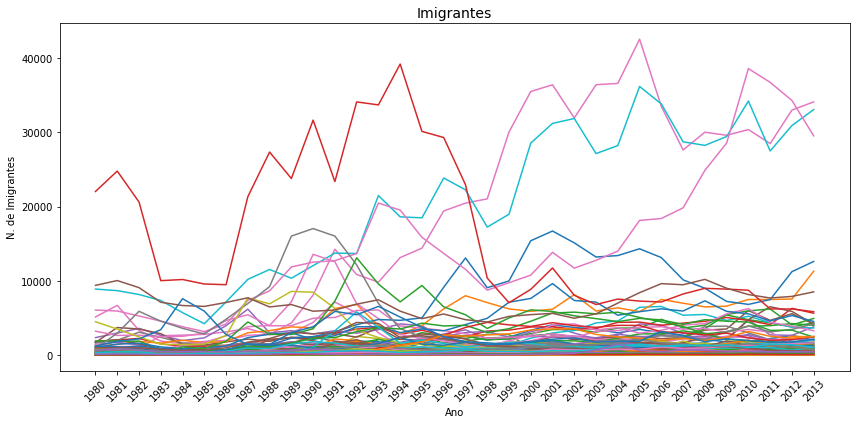

In [46]:
# Plotting multiple sets of data using for loop (E.g Immigration data of multiple countries in one plot)
plt.figure(figsize=(12,6))

for i in canada.columns:
    if canada[i].name != 'Total' and canada[i].name != 'Unknown':
        x=canada.index.values
        y=canada[i]
        sns.lineplot(x,y)

plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('N. de Imigrantes')
plt.title("Imigrantes", fontsize = 14)
plt.tight_layout()
plt.show()

In [47]:
#Simple Line Plot
fig = go.Figure()

x_values = np.linspace(0, 100, 100) # 100 evenly spaced values
y_values = np.random.randn(100)   # 100 random values

# create traces
fig.add_trace(go.Scatter(
                    x = x_values,
                    y = y_values,
                    mode = 'lines',
                    ))
 
fig.show()

In [48]:
#Line Styling
fig = go.Figure()

x_values = np.linspace(0, 100, 100) # 100 evenly spaced values
y_values = np.random.randn(100)   # 100 random values

fig.add_trace(go.Scatter(
                    x = x_values,
                    y = y_values,
                    mode = 'lines+markers',
                    ))
fig.add_trace(go.Scatter(
                    x = x_values,
                    y = y_values-5,
                    mode = 'lines',
                    ))

fig.show()

In [49]:
canada.head()

Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
1980           16        1       80               0        0       1   
1981           39        0       67               1        0       3   
1982           39        0       71               0        0       6   
1983           47        0       69               0        0       6   
1984           71        0       63               0        0       4   

      Antigua and Barbuda  Argentina  Armenia  Australia  Austria  Azerbaijan  \
1980                    0        368        0        702      234           0   
1981                    0        426        0        639      238           0   
1982                    0        626        0        484      201           0   
1983                    0        241        0        317      117           0   
1984                   42        237        0        317      127           0   

      Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  \
1980       26        0          83       372        0      511      16      2   
1981       23        2          84       376        0      540      27      5   
1982       38        1          86       299        0      519      13      4   
1983       12        1          81       244        0      297      21      3   
1984       21        1          98       265        0      183      37      4   

      Bhutan  Bolivia (Plurinational State of)  Bosnia and Herzegovina  \
1980       0                                44                       0   
1981       0                                52                       0   
1982       0                                42                       0   
1983       0                                49                       0   
1984       1                                38                       0   

      Botswana  Brazil  Brunei Darussalam  Bulgaria  Burkina Faso  Burundi  \
1980        10     211                 79        24             2        0   
1981         1     220                  6        20             1        0   
1982         3     192                  8        12             3        0   
1983         3     139                  2        33             2        0   
1984         7     145                  2        11             3        1   

      Cabo Verde  Cambodia  Cameroon  Canada  Central African Republic  Chad  \
1980           1        12         9       0                         4     0   
1981           1        19         2       0                         3     0   
1982           2        26        16       0                         1     1   
1983           0        33         7       0                         0     0   
1984          11        10         8       0                         0     0   

      Chile  China  China, Hong Kong Special Administrative Region  \
1980   1233   5123                                               0   
1981   1069   6682                                               0   
1982   1078   3308                                               0   
1983    781   1863                                               0   
1984    681   1527                                               0   

      China, Macao Special Administrative Region  Colombia  Comoros  Congo  \
1980                                           0       266        0      2   
1981                                           0       326        2      0   
1982                                           0       360        2      1   
1983                                           0       244        0      0   
1984                                           0       235        0      1   

      Costa Rica  Côte d'Ivoire  Croatia  Cuba  Cyprus  Czech Republic  \
1980          28             14        0   306     132               0   
1981          35              8        0    41     128               0   
1982          42             10        0    94      84               0   
1983          51  

In [50]:
# Plot Immigrants from China
china = go.Scatter(
                    x = canada.index,
                    y = canada['China'],
                    mode = 'lines',
                    name = 'China'
                   )

#Plot Immigrants from India
india = go.Scatter(
                    x = canada.index,
                    y = canada['India'],
                    mode = 'lines',
                    name = 'India'
                   )

#Plot Immigrants from Pakistan
pakistan = go.Scatter(
                    x = canada.index,
                    y = canada['Pakistan'],
                    mode = 'lines',
                    name = 'Pakistan'
                   )

# Layout setting
layout = go.Layout(title = '$Immigrants$', # Title
                    xaxis = dict(title = 'Year'), # x-axis label
                    yaxis = dict(title = 'Number of Immigrants'), # y-axis label
                  )

data = [china, india, pakistan]  
fig = go.Figure(data=data,layout=layout)
fig.show()

In [51]:
#Immigrants from all countires using for loop
fig = go.Figure()
for i in canada.columns:
    if canada[i].name != 'Total' and canada[i].name != 'Unknown':
        fig.add_trace(go.Scatter(x=canada.index,
                                 y=canada[i],
                                 mode='lines',
                                 name = i,
                                 connectgaps=True))
    
fig.update_layout(
                    title = 'Immigrants', # Title
                    title_font=dict(size=20),
                    xaxis = dict(title = 'Year'), # x-axis label
                    yaxis = dict(title = 'Number of Immigrants'), # y-axis label
                    font=dict(size=10),
                    width=1230,
                    height=650
                   )

fig.show()

# Bar Graphs

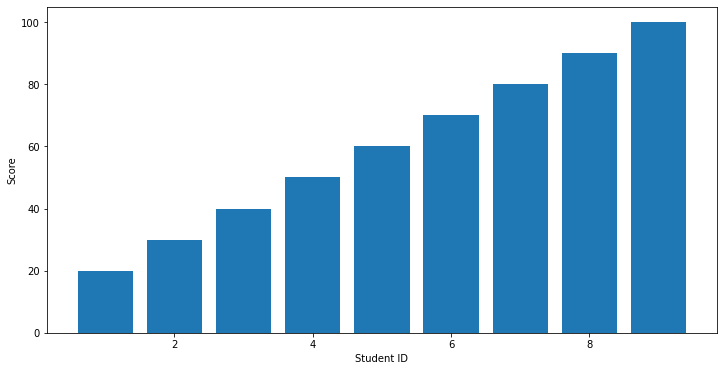

In [52]:
#Simple Bar Chart
plt.figure(figsize=(12,6)) # Setting the figure size

id1 = np.arange(1,10)
score = np.arange(20,110,10)

plt.bar(id1,score)

plt.xlabel('Student ID')
plt.ylabel('Score')

plt.show()

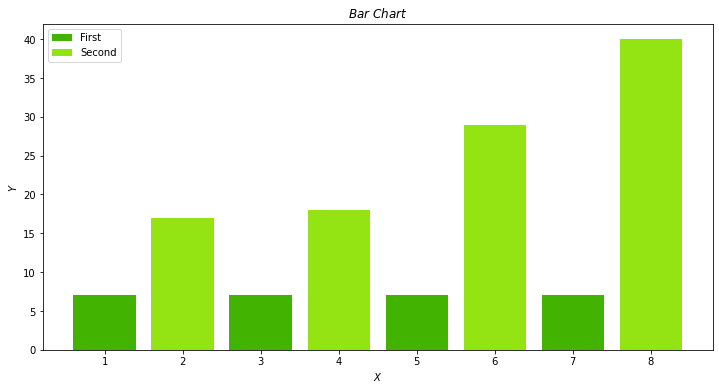

In [53]:
#Plotting multiple sets of data
plt.figure(figsize=(12,6)) # Setting the figure size

x1= [1,3,5,7] 
y1 = [7,7,7,7]

x2=[2,4,6,8]
y2= [17,18,29,40]

ax = plt.axes()
ax.set_facecolor("white")

plt.bar(x1,y1,label = "First",color = '#42B300') # First set of data
plt.bar(x2,y2,label = "Second",color = '#94E413') # Second set of data

plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title ('$Bar $ $ Chart$')

plt.legend()
plt.show()

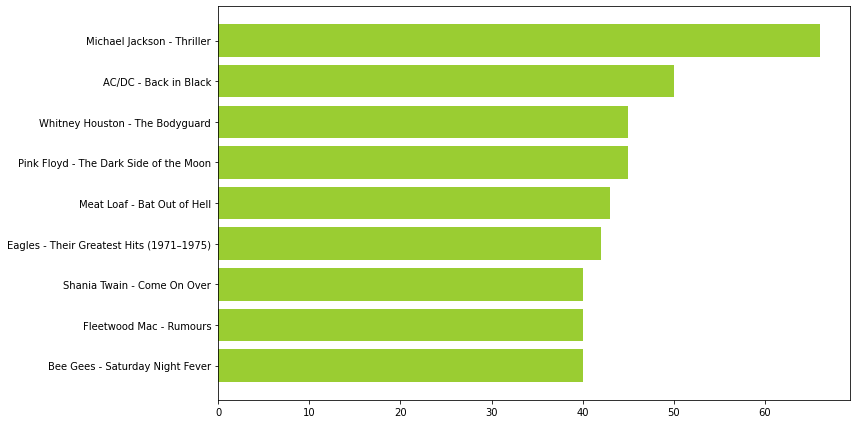

In [54]:
# Horizontal Bar Chart
plt.figure(figsize=(12,6))

sales = [66, 50, 45, 45, 43, 42, 40, 40, 40]
artist = ['Michael Jackson - Thriller',
          'AC/DC - Back in Black',
          'Whitney Houston - The Bodyguard',
          'Pink Floyd - The Dark Side of the Moon',
          'Meat Loaf - Bat Out of Hell',
          'Eagles - Their Greatest Hits (1971–1975)',
          'Shania Twain - Come On Over',
          'Fleetwood Mac - Rumours',
          'Bee Gees - Saturday Night Fever']

plt.barh(artist[::-1], sales[::-1], color ="yellowgreen")

plt.tight_layout()
plt.show()

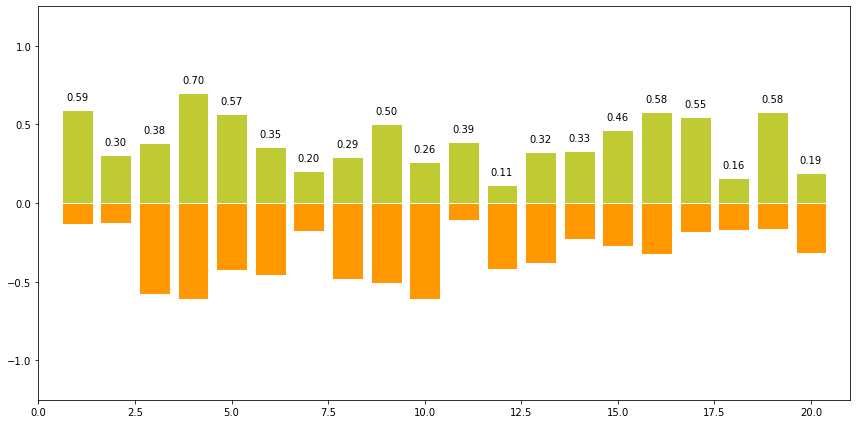

In [55]:
plt.figure(figsize=(12,6))

x = np.arange(1,21)

y1 = np.random.uniform(0.1,0.7,20)
y2 = np.random.uniform(0.1,0.7,20)

plt.bar(x, +y1, facecolor='#C0CA33', edgecolor='white') #specify edgecolor by name
plt.bar(x, -y2, facecolor='#FF9800', edgecolor='white')

for x,y in zip(x,y1):
    plt.text(x, y+0.05, '%.2f' % y, ha='center', va='bottom', fontsize=10)
    
plt.xlim(0,21)
plt.ylim(-1.25,+1.25)

plt.tight_layout()
plt.show()

### Stacked Vertical Bar

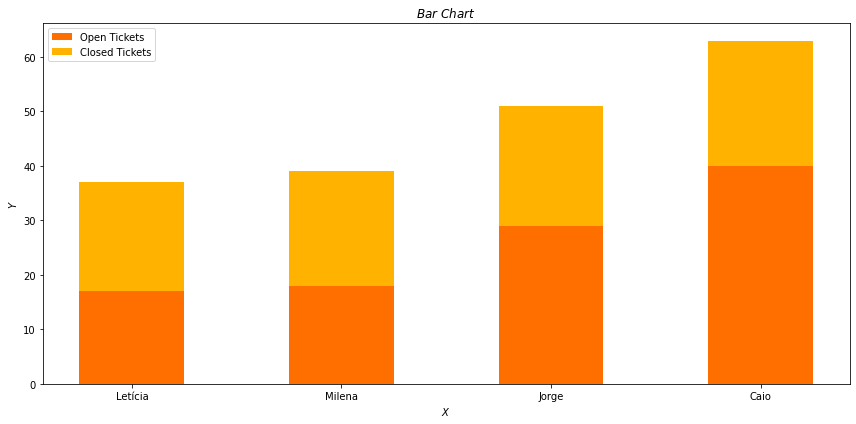

In [56]:
plt.figure(figsize=(12,6))

x1= ['Letícia','Milena','Jorge','Caio']
y1= [17,18,29,40]
y2 = [20,21,22,23]

plt.bar(x1,y1,label = "Open Tickets",width = 0.5,color = '#FF6F00')
plt.bar(x1,y2,label = "Closed Tickets",width = 0.5 ,bottom = y1 , color = '#FFB300')

plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title ('$Bar $ $ Chart$')
plt.legend()

plt.tight_layout()
plt.show()

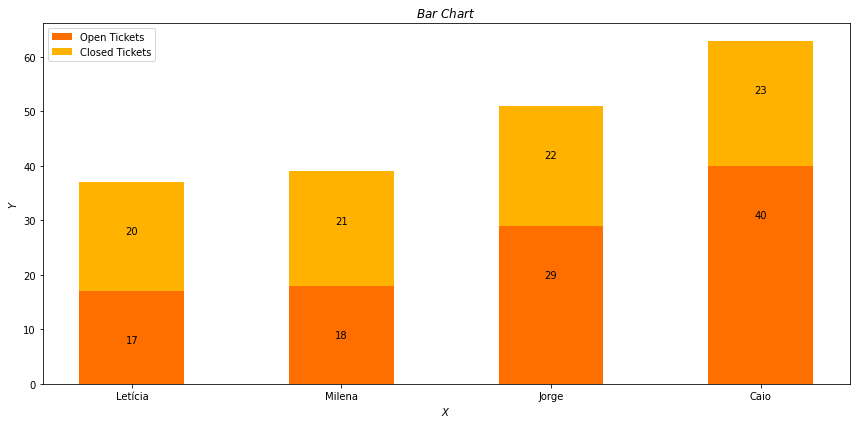

In [57]:
# Displaying values in the stacked vertical bars using plt.text()
plt.figure(figsize=(12,6))

x1= ['Letícia','Milena','Jorge','Caio']
y1= [17,18,29,40]
y2 = [20,21,22,23]

plt.bar(x1,y1,label = "Open Tickets",width = 0.5,color = '#FF6F00')
plt.bar(x1,y2,label = "Closed Tickets",width = 0.5 ,bottom = y1 , color = '#FFB300')

plt.xlabel('$X$')
plt.ylabel('$Y$')

plt.title ('$Bar $ $ Chart$')
for x,y in zip(x1,y1):
    plt.text(x, y-10, '%d' % y, ha='center' , va= 'bottom')

for x,y,z in zip(x1,y2,y1):
    plt.text(x, y+z-10, '%d' % y, ha='center' , va= 'bottom')
    
plt.legend()
plt.tight_layout()
plt.show()

### Grouped Bar Chart

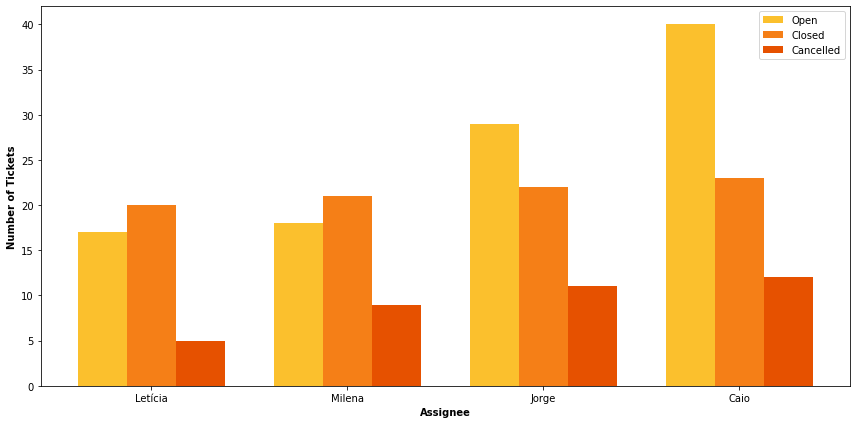

In [58]:
# Grouped Bar Chart

plt.figure(figsize=(12,6))

# set width of bar
barWidth = 0.25
 
# set height of bar
y1 = np.array([17,18,29,40])
y2 = np.array([20,21,22,23])
y3 = np.array([5,9,11,12])
 
# Set position of bar on X axis
pos1 = np.arange(len(y1))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]

# Make the plot
plt.bar(pos1, y1, color='#FBC02D', width=barWidth, label='Open')
plt.bar(pos2, y2, color='#F57F17', width=barWidth, label='Closed')
plt.bar(pos3, y3, color='#E65100', width=barWidth, label='Cancelled')

# Add xticks on the middle of the group bars
plt.xlabel('Assignee', fontweight='bold')
plt.ylabel('Number of Tickets', fontweight='bold')
plt.xticks([i + barWidth for i in range(len(y1))], ['Letícia','Milena','Jorge','Caio'])

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()

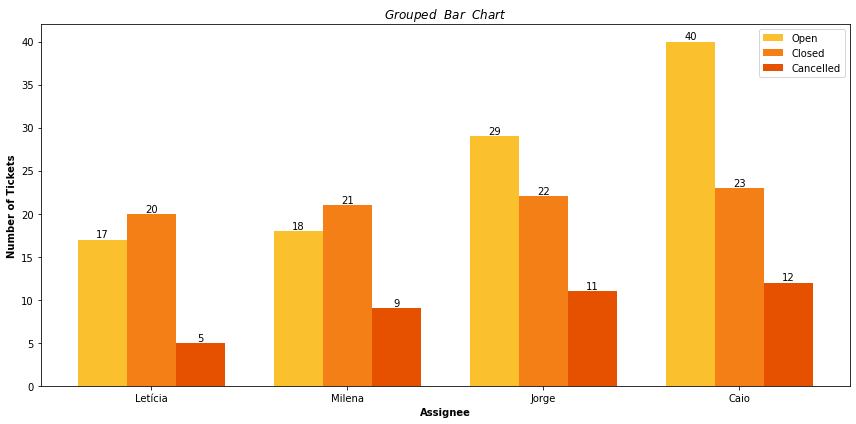

In [59]:
# Displaying values at the top of the Grouped Bar Chart using plt.text()
plt.figure(figsize=(12,6))

# set width of bar
barWidth = 0.25
 
# set height of bar
y1= np.array([17,18,29,40])
y2 =np.array([20,21,22,23])
y3 =np.array([5,9,11,12])
 
# Set position of bar on X axis
pos1 = np.arange(len(y1))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]

# Make the plot
plt.bar(pos1, y1, color='#FBC02D', width=barWidth, label='Open')
plt.bar(pos2, y2, color='#F57F17', width=barWidth, label='Closed')
plt.bar(pos3, y3, color='#E65100', width=barWidth, label='Cancelled')

# Add xticks on the middle of the group bars
plt.xlabel('Assignee', fontweight='bold')
plt.ylabel('Number of Tickets', fontweight='bold')
plt.xticks([i + barWidth for i in range(len(y1))], ['Letícia','Milena','Jorge','Caio'])

for x,y in zip(pos1,y1):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')
    
for x,y in zip(pos2,y2):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')

for x,y in zip(pos3,y3):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')

plt.title ('$Grouped $  $ Bar $  $ Chart$')

# Create legend & Show graphic
plt.legend()

plt.tight_layout()
plt.show()

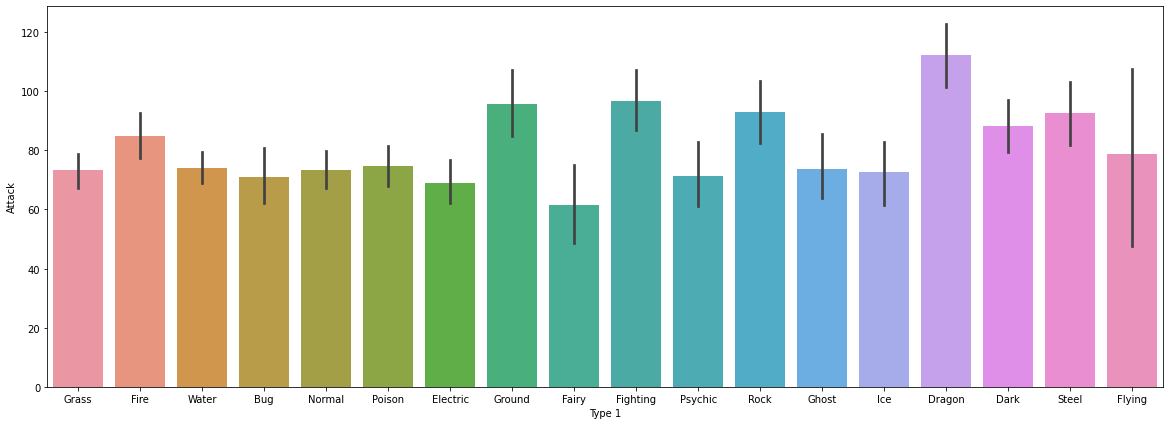

In [60]:
plt.figure(figsize=(20,7))
sns.barplot(x=pokemon['Type 1'], y=pokemon['Attack'])
plt.show()

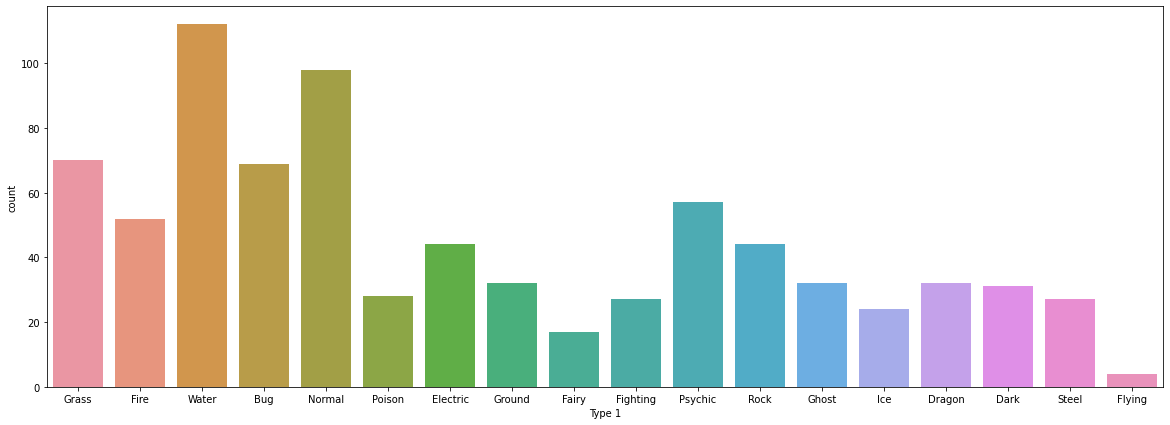

In [61]:
plt.figure(figsize=(20,7))
sns.countplot(x=pokemon['Type 1'])
plt.show()

In [62]:
fig = go.Figure()

x = ['Letícia','Milena','Jorge','Caio', 'Arthur', 'Pedro', 'Nicolas']
y1 = [17,18,29,33,38,39,42]
y2 = [20,21,22,23,21,28,25]
y3 = [5,13,11,12,13,11,16]

fig.add_trace(go.Bar(
             x= x,
             y= y1,
             marker= dict (color ='#FF6F00'),
             name = 'Open Tickets',
#              orientation='h',
             text=y1,
             textposition='auto'           
             ))

fig.add_trace(go.Bar(
             x= x,
             y= y2,
             marker={'color' : '#FFB300'},
             name = 'Closed Tickets',
#              orientation='h',
             text=y2,
             textposition='auto'  
              ))


fig.add_trace(go.Bar(
             x= x,
             y= y3,
             marker={'color' : '#F7DC6F'},
             name = 'Cancelled Tickets',
#              orientation='h',
             text=y3,
             textposition='auto'  
              ))  
    
fig.update_layout(
                   title= 'Open Tickets by Status' , 
                   barmode = 'stack',
                   width=990,
                   height=550
                  )

fig.show()

# Stacked Horizontal Bar

In [63]:
fig = go.Figure()

x = ['Letícia','Milena','Jorge','Caio', 'Arthur', 'Pedro', 'Nicolas']
y1 = [17,18,29,33,38,39,42]
y2 = [20,21,22,23,21,28,25]
y3 = [5,13,11,12,13,11,16]

fig.add_trace(go.Bar(
             x= y1,
             y= x,
             marker= dict (color ='#FF6F00'),
             name = 'Open Tickets',
             orientation='h',
             text=y1,
             textposition='auto'           
             ))

fig.add_trace(go.Bar(
             x= y2,
             y= x,
             marker={'color' : '#FFB300'},
             name = 'Closed Tickets',
             orientation='h',
             text=y2,
             textposition='auto'  
              ))


fig.add_trace(go.Bar(
             x= y3,
             y= x,
             marker={'color' : '#F7DC6F'},
             name = 'Cancelled Tickets',
             orientation='h',
             text=y3,
             textposition='auto'  
              ))  
    
fig.update_layout(
                   title= 'Open Tickets by Status' , 
                   barmode = 'stack',
                   width=990,
                   height=550
                  )

fig.show()

# Grouped Bar Chart

In [64]:
fig = go.Figure()

x = ['Letícia','Milena','Jorge','Caio', 'Arthur', 'Pedro', 'Nicolas']
y1 = [17,18,29,33,38,39,42]
y2 = [20,21,22,23,21,28,25]
y3 = [5,13,11,12,13,11,16]

fig.add_trace(go.Bar(
             x= x,
             y= y1,
             marker= dict (color ='#FF6F00'),
             name = 'Open Tickets',
#              orientation='h',
             text=y1,
             textposition='auto'           
             ))

fig.add_trace(go.Bar(
             x= x,
             y= y2,
             marker={'color' : '#FFB300'},
             name = 'Closed Tickets',
#              orientation='h',
             text=y2,
             textposition='auto'  
              ))


fig.add_trace(go.Bar(
             x= x,
             y= y3,
             marker={'color' : '#F7DC6F'},
             name = 'Cancelled Tickets',
#              orientation='h',
             text=y3,
             textposition='auto'  
              ))  
    
fig.update_layout(
                   title= 'Open Tickets by Status' , 
                   barmode = 'group',
                   width=990,
                   height=550
                  )

fig.show()

# 100% Stacked Bar Chart

In [65]:
col1 = ['Strongly Agree' , 'Agree' , 'Neutral' , 'Disagree' , 'Strongly Disagree',]
index1 = ['Python' , 'Java' , 'Julia' , 'C++' , 'C']
review = np.array([[428, 111, 70, 101, 80],
                   [370, 222, 80, 104, 70],
                   [298, 121, 90, 102, 60],
                   [310, 141, 100, 109, 56],
                   [400, 121, 110, 107, 78]]
                 )

rating = pd.DataFrame(data=review,index=index1,columns=col1)
rating

Strongly Agree  Agree  Neutral  Disagree  Strongly Disagree
Python             428    111       70       101                 80
Java               370    222       80       104                 70
Julia              298    121       90       102                 60
C++                310    141      100       109                 56
C                  400    121      110       107                 78

In [66]:
rating['Total'] = rating.sum(axis=1)
rating

Strongly Agree  Agree  Neutral  Disagree  Strongly Disagree  Total
Python             428    111       70       101                 80    790
Java               370    222       80       104                 70    846
Julia              298    121       90       102                 60    671
C++                310    141      100       109                 56    716
C                  400    121      110       107                 78    816

In [67]:
rating = rating.assign(**{'Strongly Agree (%)': np.nan, 
             'Agree (%)' : np.nan, 
             'Neutral (%)': np.nan ,
             'Disagree (%)' : np.nan, 
             'Strongly Disagree (%)': np.nan,
            })
rating

Strongly Agree  Agree  Neutral  Disagree  Strongly Disagree  Total  \
Python             428    111       70       101                 80    790   
Java               370    222       80       104                 70    846   
Julia              298    121       90       102                 60    671   
C++                310    141      100       109                 56    716   
C                  400    121      110       107                 78    816   

        Strongly Agree (%)  Agree (%)  Neutral (%)  Disagree (%)  \
Python                 NaN        NaN          NaN           NaN   
Java                   NaN        NaN          NaN           NaN   
Julia                  NaN        NaN          NaN           NaN   
C++                    NaN        NaN          NaN           NaN   
C                      NaN        NaN          NaN           NaN   

        Strongly Disagree (%)  
Python                    NaN  
Java                      NaN  
Julia                     NaN  
C++                       NaN  
C                         NaN

In [68]:
for i in range(0,len(rating['Strongly Agree'])):
    k=0
    for j in range(int(len(rating.iloc[0])/2)+1 , len(rating.iloc[0])):
        rating.iat[i,j] =  np.round((rating.iat[i,k] / rating.iat[i,5])*100 ,decimals=2)
        k=k+1
rating

Strongly Agree  Agree  Neutral  Disagree  Strongly Disagree  Total  \
Python             428    111       70       101                 80    790   
Java               370    222       80       104                 70    846   
Julia              298    121       90       102                 60    671   
C++                310    141      100       109                 56    716   
C                  400    121      110       107                 78    816   

        Strongly Agree (%)  Agree (%)  Neutral (%)  Disagree (%)  \
Python               54.18      14.05         8.86         12.78   
Java                 43.74      26.24         9.46         12.29   
Julia                44.41      18.03        13.41         15.20   
C++                  43.30      19.69        13.97         15.22   
C                    49.02      14.83        13.48         13.11   

        Strongly Disagree (%)  
Python                  10.13  
Java                     8.27  
Julia                    8.94  
C++                      7.82  
C                        9.56

In [69]:
fig = go.Figure()

# Trace to plot "Strongly Agree" percentage
fig.add_trace(
               go.Bar(
                       x= rating['Strongly Agree (%)'],
                       y= rating.index,
                       marker= dict (color ='#2E7D32',line=dict(color='#2E7D32',width=2)),
                       name = 'Strongly Agree (%)',
                       orientation='h',
                       textposition='auto',
                      )
             )


# Trace to plot "Agree" percentage
fig.add_trace(
               go.Bar(
                       x= rating['Agree (%)'],
                       y= rating.index,
                       marker= dict (color ='#8BC34A',line=dict(color='#8BC34A',width=2)),
                       name = 'Agree (%)',
                       orientation='h',
                       textposition='auto',
                      )
             )



# Trace to plot "Neutral" percentage
fig.add_trace(
               go.Bar(
                       x= rating['Neutral (%)'],
                       y= rating.index,
                       marker= dict (color ='#D4E157',line=dict(color='#D4E157',width=2)),
                       name = 'Neutral (%)',
                       orientation='h',
                       textposition='auto',
                      )
             )



# Trace to plot "Disagree" percentage
fig.add_trace(
               go.Bar(
                       x= rating['Disagree (%)'],
                       y= rating.index,
                       marker= dict (color ='#FFB300',line=dict(color='#FFB300',width=2)),
                       name = 'Disagree (%)',
                       orientation='h',
                       textposition='auto',
                      )
             )




# Trace to plot "Strongly Disagree" percentage
fig.add_trace(
               go.Bar(
                       x= rating['Strongly Disagree (%)'],
                       y= rating.index,
                       marker= dict (color ='#FF7043',line=dict(color='#FF7043',width=2)),
                       name = 'Strongly Disagree (%)',
                       orientation='h',
                       textposition='auto',
                      )
             )


# Layout setting
fig.update_layout(
                   title=dict(text = "Best Programming Language",x=0.44,y=0.95,font_size=20), 
                   barmode = 'stack',
                   width=1000,
                   height=500,
                   margin=dict(l=70, r=0, t=70, b=70),
                   paper_bgcolor='rgb(248, 248, 255)',
                   plot_bgcolor='rgb(248, 248, 255)',
                  )

annotations =[]



# Displaying bar percentage label for "Strongly Agree"
for perc, lang in zip(rating.iloc[:,6],rating.index):
    # labeling the bar percentage
    annotations.append(dict(xref='x', 
                            yref='y',
                            y=lang, 
                            x=perc/2 , 
                            text=str(perc) + ' %',
                            font=dict(family='Arial', size=12,color='white'),
                            showarrow=False))


# Displaying bar percentage label for "Agree"
i=0
for perc, lang in zip(rating.iloc[:,7],rating.index):
    # labeling the bar percentage
    annotations.append(dict(xref='x', 
                            yref='y',
                            y=lang, 
                            x=perc/2 + rating.iloc[i,6],
                            text=str(perc) + ' %',
                            font=dict(family='Arial', size=12,color='white'),
                            showarrow=False))
    i+=1


# Displaying bar percentage label for "Neutral"
i=0
for perc, lang in zip(rating.iloc[:,8],rating.index):
    # labeling the bar percentage
    annotations.append(dict(xref='x', 
                            yref='y',
                            y=lang, 
                            x=perc/2 + rating.iloc[i,6]+rating.iloc[i,7],
                            text=str(perc) + ' %',
                            font=dict(family='Arial', size=12,color='black'),
                            showarrow=False))
    i+=1
    
    

# Displaying bar percentage label for "Disagree"
i=0
for perc, lang in zip(rating.iloc[:,9],rating.index):
    # labeling the bar percentage
    annotations.append(dict(xref='x', 
                            yref='y',
                            y=lang, 
                            x=perc/2 + rating.iloc[i,6]+rating.iloc[i,7]+rating.iloc[i,8],
                            text=str(perc) + ' %',
                            font=dict(family='Arial', size=12,color='black'),
                            showarrow=False))
    i+=1

    
    
# Displaying bar percentage label for "Strongly Disagree"
i=0
for perc, lang in zip(rating.iloc[:,10],rating.index):
    # labeling the bar percentage
    annotations.append(dict(xref='x', 
                            yref='y',
                            y=lang, 
                            x=perc/2 + rating.iloc[i,6]+rating.iloc[i,7]+rating.iloc[i,8] + rating.iloc[i,9],
                            text=str(perc) + ' %',
                            font=dict(family='Arial', size=12,color='black'),
                            showarrow=False))
    i+=1

fig.update_layout(annotations=annotations)

fig.show()

In [70]:
#Optimized code for above visualization
fig = go.Figure()
cols = ['#2E7D32' , '#8BC34A' , '#D4E157' , '#FFB300' , '#FF7043']

for i in range (0,5):
    fig.add_trace(
               go.Bar(
                       x= rating.iloc[:,6+i],
                       y= rating.index,
                       marker= dict (color =cols[i],line=dict(color=cols[i],width=2)),
                       name = 'Strongly Agree (%)',
                       orientation='h',
                       textposition='auto',
                      )
                 )

fig.update_layout(
                   title=dict(text = "Best Programming Language",x=0.44,y=0.95,font_size=20), 
                   barmode = 'stack',
                   width=1000,
                   height=500,
                   margin=dict(l=70, r=0, t=70, b=70),
                   paper_bgcolor='rgb(248, 248, 255)',
                   plot_bgcolor='rgb(248, 248, 255)',
                  )

annotations =[]


i=0   
for j in range(1,6):
    if j==1:
        for perc, lang in zip(rating.iloc[:,5+j],rating.index):
            # labeling the bar percentage
            annotations.append(dict(xref='x', 
                            yref='y',
                            y=lang, 
                            x=perc/2 , 
                            text=str(perc) + ' %',
                            font=dict(family='Arial', size=12,color='white'),
                            showarrow=False))
        sum1 = rating.iloc[:,5+j]
    
    
    else:
        i=0
        for perc, lang in zip(rating.iloc[:,5+j],rating.index):
            # labeling the bar percentage
            annotations.append(dict(xref='x', 
                            yref='y',
                            y=lang, 
                            x=perc/2 + sum1[i],
                            text=str(perc) + ' %',
                            font=dict(family='Arial', size=12,color='black'),
                            showarrow=False))
            i+=1
        sum1 = sum1+ rating.iloc[:,5+j]

fig.update_layout(annotations=annotations)

fig.show()

# Histogram

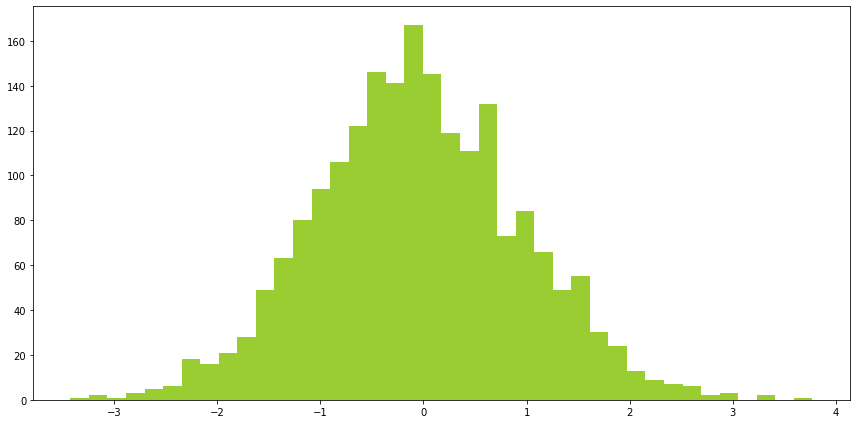

In [71]:
plt.figure(figsize=(12,6))

x = np.random.normal(size = 2000)
plt.hist(x, bins=40, color='yellowgreen')

plt.tight_layout()
plt.show()

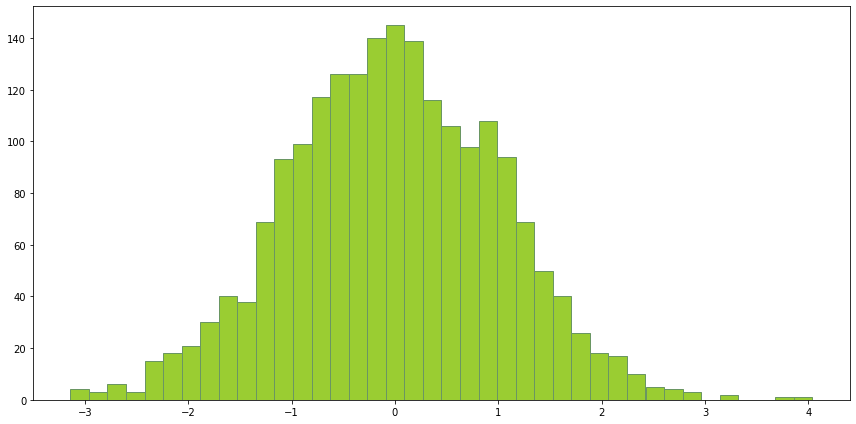

In [72]:
# Using Edge Color for readability
plt.figure(figsize=(12,6))

x = np.random.normal(size = 2000)
plt.hist(x, bins=40, color='yellowgreen', edgecolor="#6A9662")

plt.tight_layout()
plt.show()

#### Plotting Multiple Histograms

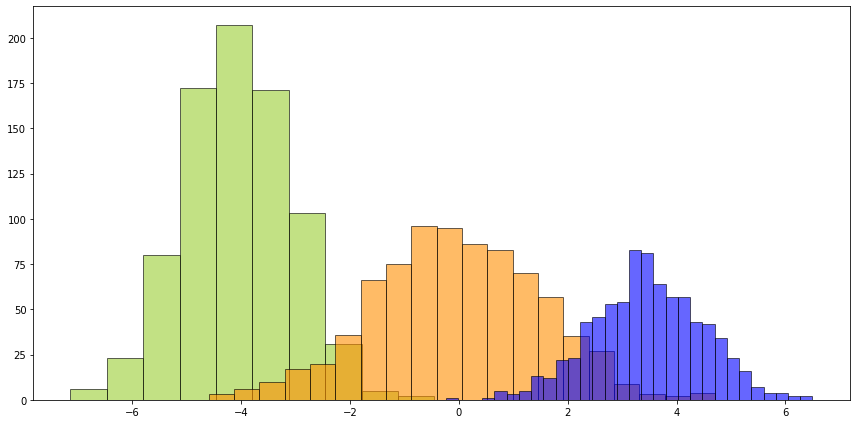

In [73]:
plt.figure(figsize=(12,6))

x = np.random.normal(-4,1,size = 800)
y = np.random.normal(0,1.5,size = 800)
z = np.random.normal(3.5,1,size = 800)

plt.hist(x, bins=10, color='yellowgreen', edgecolor="black", alpha=0.6)
plt.hist(y, bins=20, color='#FF8F00', edgecolor="black", alpha=0.6)
plt.hist(z, bins=30, color='blue', edgecolor="black", alpha=0.6)

plt.tight_layout()
plt.show()

# Dist Plot

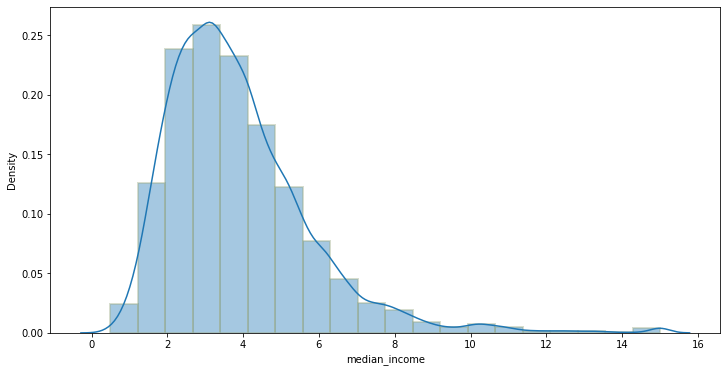

In [74]:
plt.figure(figsize=(12,6))
sns.distplot(housing["median_income"], bins=20, hist_kws=dict(edgecolor = '#9dab86', linewidth=2))
plt.show()

# KDE PLOT

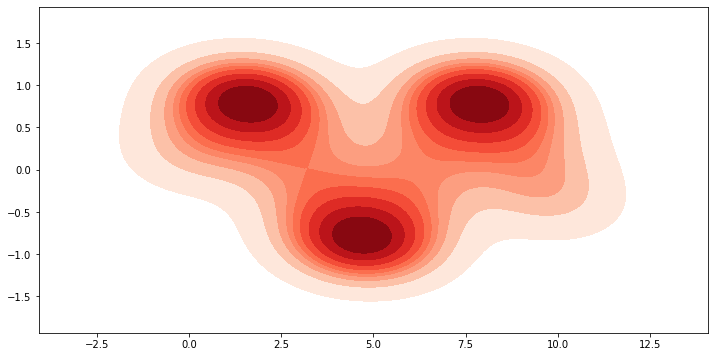

In [75]:
plt.figure(figsize=(12,6))

x = np.linspace(0, 10, 100) 
y = np.sin(x)

sns.kdeplot(x,y,shade=True,cmap="Reds", shade_lowest=False)

plt.show();

# Pie Charts

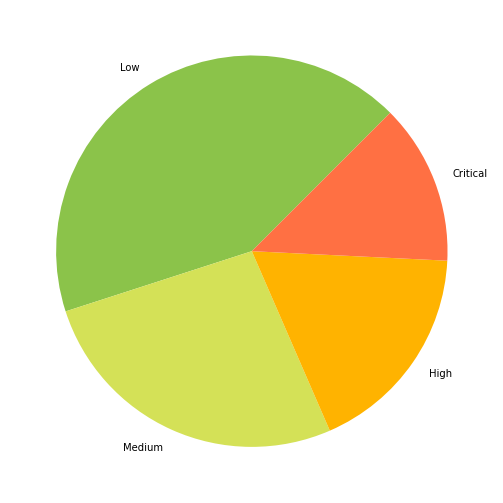

In [76]:
plt.figure(figsize=(9,9))
tickets = [48 , 30 , 20 , 15]
labels = ['Low' , 'Medium' , 'High' , 'Critical']
colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']
plt.pie(tickets, labels=labels, colors=colors, startangle=45)
plt.show()

#### Display percentage and actual value in Pie Chart

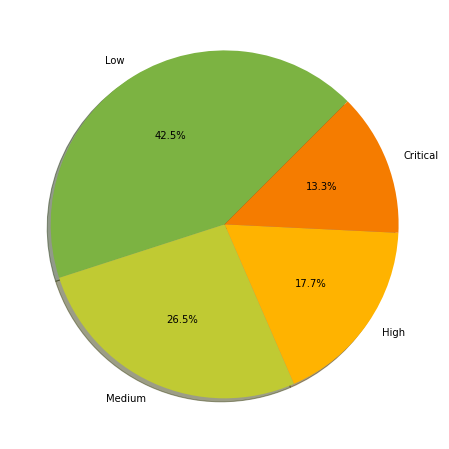

In [77]:
# Display percentage in Pie Chart using autopct='%1.1f%%' 
plt.figure(figsize=(8,8))
tickets = [48 , 30 , 20 , 15]
labels = ['Low' , 'Medium' , 'High' , 'Critical']
colors = ['#7CB342','#C0CA33','#FFB300','#F57C00']
plt.pie (tickets , labels= labels , colors= colors , startangle=45 , shadow='true', autopct='%1.1f%%', explode=[0, 0, 0, 0])
plt.show()

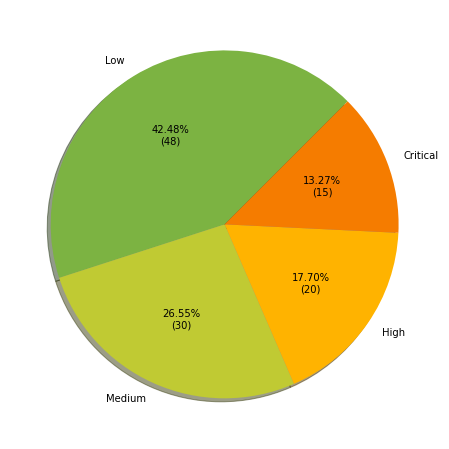

In [78]:
plt.figure(figsize=(8,8))
tickets = [48 , 30 , 20 , 15]
total = np.sum(tickets)
labels = ['Low' , 'Medium' , 'High' , 'Critical']

def val_per(x): 
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

colors = ['#7CB342','#C0CA33','#FFB300','#F57C00']
plt.pie (tickets , labels= labels , colors= colors , startangle=45 , shadow='true', autopct=val_per, explode=[0, 0, 0, 0])
plt.show()

#### Explode Slice in Pie Chart

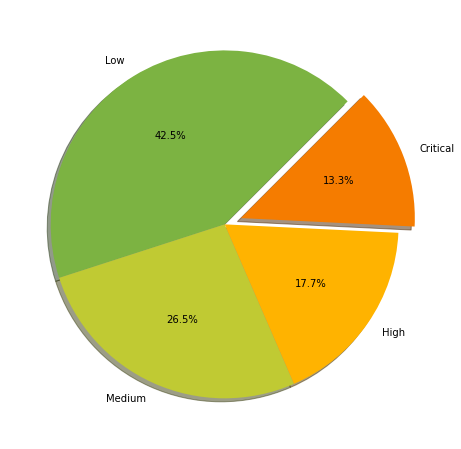

In [79]:
#Explode 4th Slice
plt.figure(figsize=(8,8))
tickets = [48 , 30 , 20 , 15]
labels = ['Low' , 'Medium' , 'High' , 'Critical']
colors = ['#7CB342','#C0CA33','#FFB300','#F57C00']

plt.pie (tickets , labels= labels , colors= colors , startangle=45 , autopct='%1.1f%%' , shadow='true', explode=[0, 0, 0, 0.1])
plt.show()

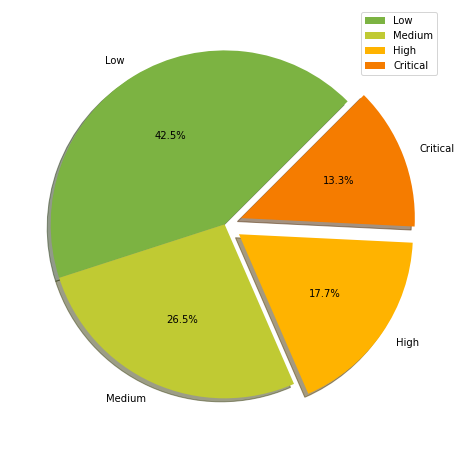

In [80]:
#Explode 3rd & 4th Slice
plt.figure(figsize=(8,8))
tickets = [48 , 30 , 20 , 15]
label = ['Low' , 'Medium' , 'High' , 'Critical']
color = ['#7CB342','#C0CA33','#FFB300','#F57C00']

plt.pie (tickets , labels= label , colors= color , startangle=45 ,autopct='%1.1f%%', shadow='true', explode=[0, 0, 0.1 , 0.1])
plt.legend()
plt.show()

#### Display multiple pie plots in one figure

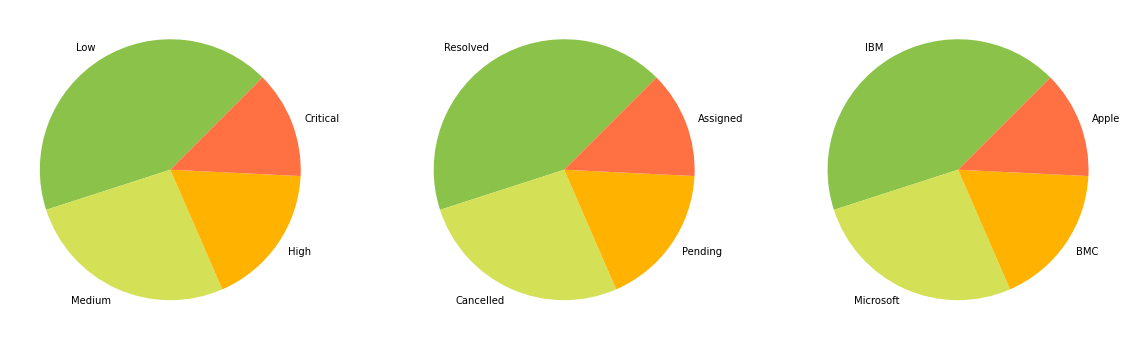

In [81]:
fig = plt.figure(figsize=(20,6))
tickets = [48 , 30 , 20 , 15]
priority = ['Low' , 'Medium' , 'High' , 'Critical']
status = ['Resolved' , 'Cancelled' , 'Pending' , 'Assigned']
company = ['IBM' , 'Microsoft', 'BMC' , 'Apple']
colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']

plt.subplot(1,3,1)
plt.pie(tickets, labels = priority, colors=colors, startangle=45)


plt.subplot(1,3,2)
plt.pie(tickets, labels = status, colors=colors, startangle=45)


plt.subplot(1,3,3)
plt.pie(tickets, labels = company, colors=colors, startangle=45)

plt.show()

In [82]:
#Simple Pie Chart
fig = go.Figure()

tickets = [48 , 30 , 20 , 15]
status = ['Low' , 'Medium' , 'High' , 'Critical']

fig.add_trace(go.Pie(values= tickets,
                     labels= status))
              
fig.show()

In [83]:
#Changing color of Pie Chart
fig = go.Figure()
tickets = [48 , 30 , 20 , 15]
status = ['Low' , 'Medium' , 'High' , 'Critical']
colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']

fig.add_trace(go.Pie(values= tickets,
                     labels= status,
                     marker=dict(colors=colors),
                     textinfo='label+value+percent',
                     pull=[0, 0, 0, 0.2],
                     hole=.4))
              
fig.update_layout(
                   title=dict(text = "Tickets by Priority",
                              x=0.46,y=0.95,font_size=20),
                   width=650,
                   height=650
                  )

fig.show()

# Violin Plot

In [84]:
employment.head()

Age Gender  Period  Unemployed
0  16 to 19 years    Men  jan/05       91000
1  20 to 24 years    Men  jan/05      175000
2  25 to 34 years    Men  jan/05      194000
3  35 to 44 years    Men  jan/05      201000
4  45 to 54 years    Men  jan/05      207000

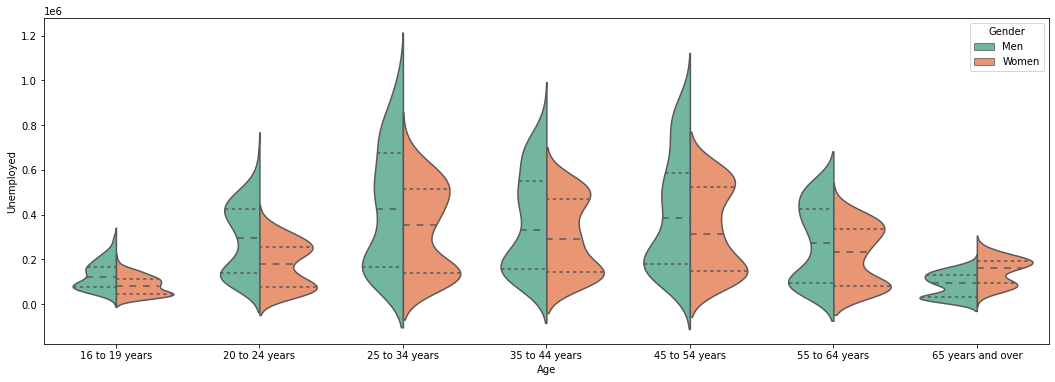

In [85]:
plt.figure(figsize=(18,6))
sns.violinplot(x=employment['Age'], y=employment['Unemployed'], hue=employment['Gender'], 
               palette="Set2", split=True, inner="quartile")
plt.show()

# Box Plot

In [86]:
insurance.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

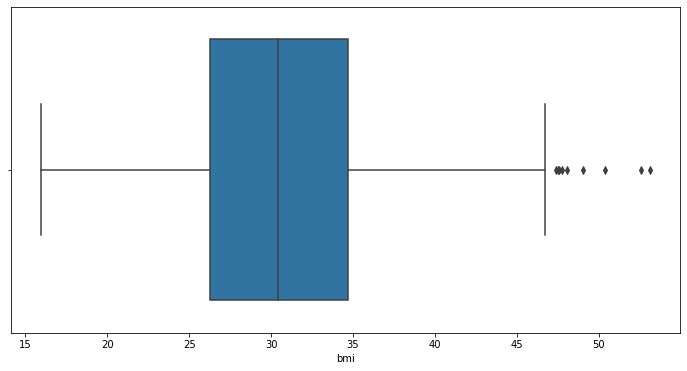

In [87]:
# Simple boxplot
plt.figure(figsize=(12,6))
sns.boxplot(insurance['bmi']);

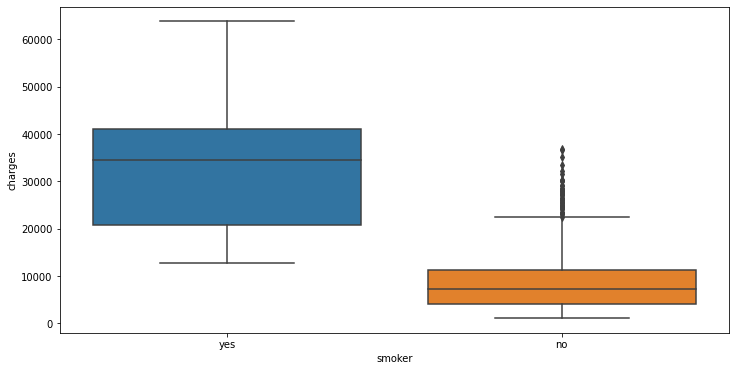

In [88]:
# Vertical boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=insurance['smoker'], y=insurance['charges']);

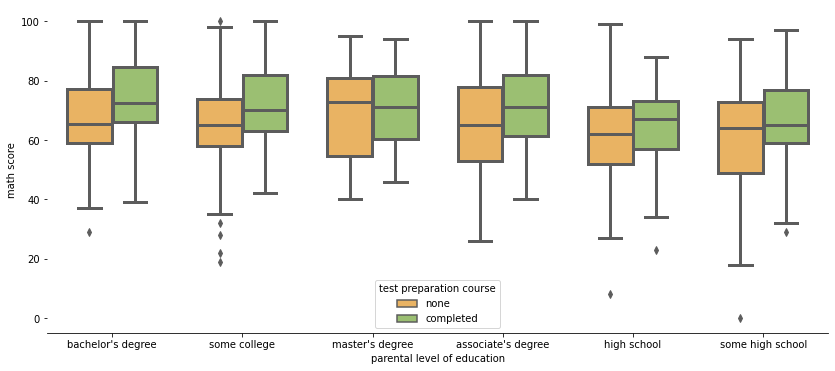

In [89]:
# Changing Linewidth
plt.figure(figsize = (14,6))
sns.boxplot(x= stdperf['parental level of education'] , y= stdperf['math score'] , 
            width=.7 , hue=stdperf['test preparation course'] , 
            palette= {"none":'#FFB74D' , "completed":'#9CCC65'} ,linewidth = 3)
sns.despine(left=True)
plt.show()

# Pair Plot

#### Pair Plot is used for plotting pairwise relationships in a dataset.

In [90]:
fish.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

<Figure size 1080x648 with 0 Axes>

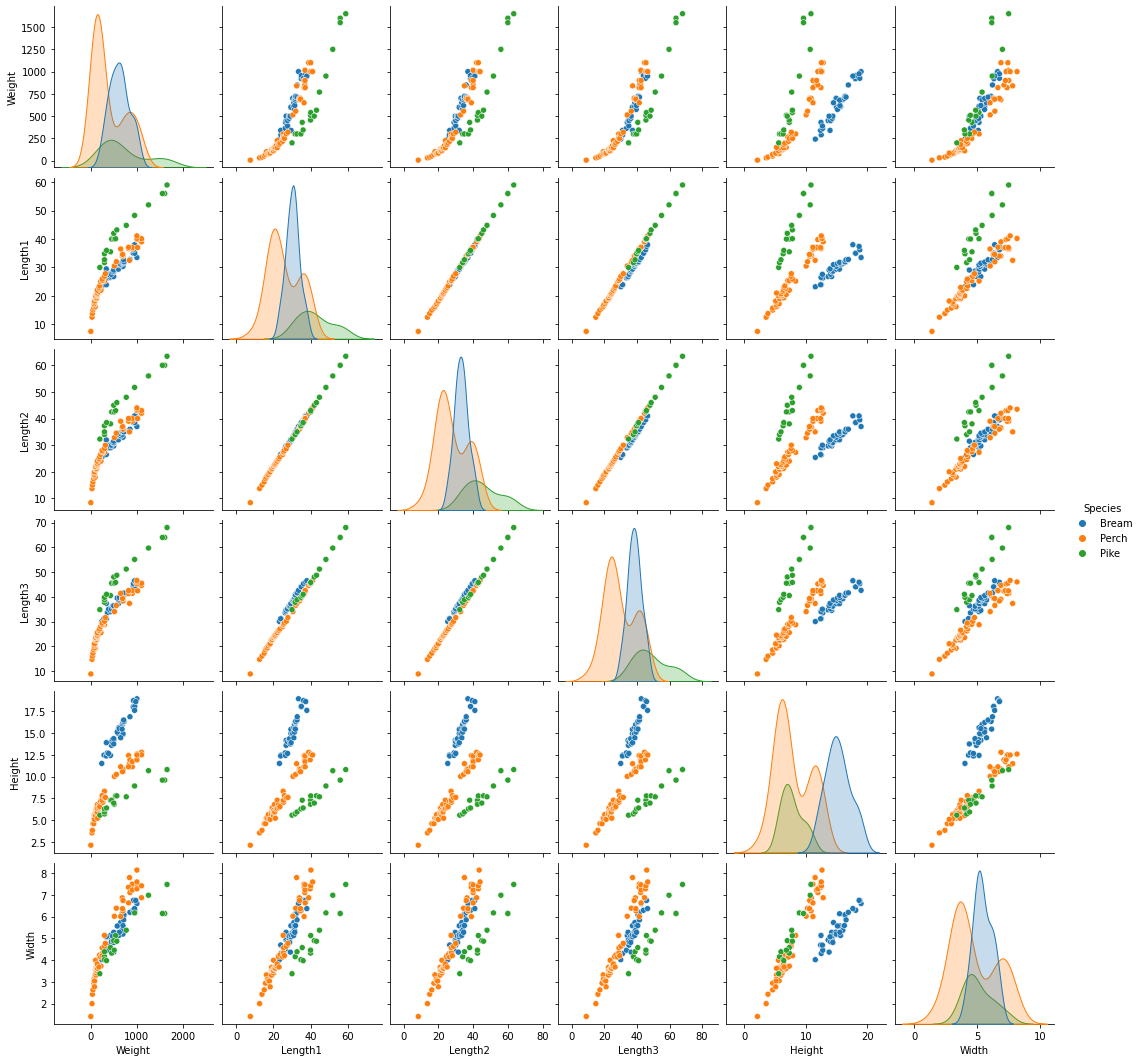

In [91]:
plt.figure(figsize=(15,9))
sns.pairplot(fish1, hue = 'Species')
plt.show();

# Heat Map

In [92]:
canada1 = canada.loc['2004': , ['Germany' , 'France' , 'Mexico' , 'Bangladesh' ,'Brazil','Israel' , 'Egypt' , 'Colombia' , 'Iraq','Jamaica']]
canada1.head()

Germany  France  Mexico  Bangladesh  Brazil  Israel  Egypt  Colombia  \
2004     2020    4391    2259        2660     917    2788   2393      4566   
2005     2226    4429    2837        4171     969    2446   2496      6424   
2006     2767    4002    2844        4014    1181    2625   2190      6535   
2007     2449    4290    3239        2897    1746    2401   2356      5357   
2008     3833    4532    2856        2939    2138    2562   3347      5452   

      Iraq  Jamaica  
2004  1796     2237  
2005  2226     1945  
2006  1788     1722  
2007  2406     2141  
2008  3543     2334

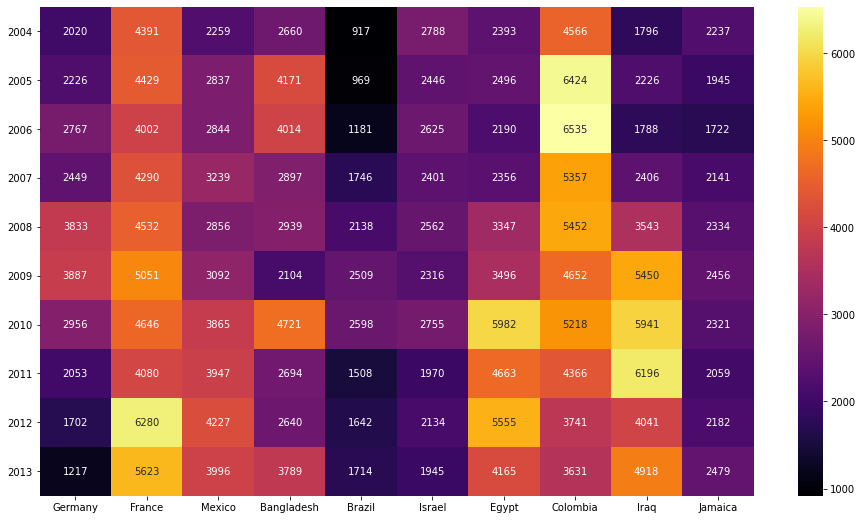

In [93]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(canada1, cmap="inferno", annot=True, fmt="d")
plt.yticks(rotation=0)
plt.show()

### Animation

In [94]:
df = px.data.gapminder()

In [95]:
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [96]:
fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()

In [97]:
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])